In [3]:
import pandas as pd

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

**automatic result export**

In [ ]:
#still have to work on static link
#for now check automatic resuts export notebook 

In [5]:
df = pd.read_csv('Espacenet_search_result.csv', delimiter=';')

In [ ]:
#skipping the first rows with description of the search
df = pd.read_csv('search_results.csv',delimiter=';', skiprows=7)

In [6]:
df.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'Unnamed: 11'],
      dtype='object')

In [7]:
#some 
df[['first publication date','second publication date']] = df['Publication date'].str.split(' ' , n=1 , expand= True)
df['second publication date'] = df['second publication date'].str.strip('\n')
df.head()

,No,Title,Inventors,Applicants,Publication number,Earliest priority,IPC,CPC,Publication date,Earliest publication,Family number,Unnamed: 11,first publication date,second publication date
0,1,Plug-in hybrid vehicle with fast energy storage,BENDER DONALD A [US] \nDESHMANE ATUL [US] \nME...,AFS TRINITY POWER CORP [US],US2006250902A1,2005-05-05,H04B1/20,"B60K6/20 (KR) \nB60K6/28 (KR) \nB60K6/30 (EP,U...",2006-11-09,2006-11-09,37397092,NaN,2006-11-09,None
1,2,Electric vehicle wireless charging system thro...,SON JEONG KI [KR],SON JEONG KI [KR],KR20230163874A,2022-05-24,B60L53/12 \nB60L53/38 \nB60L53/54 \nB60L53/66 ...,B60L53/12 (KR) \nB60L53/38 (KR) \nB60L53/54 (K...,2023-12-01,2023-12-01,89124565,NaN,2023-12-01,None
2,3,Electric vehicle charging system using hydroge...,HONG SEONG HO,HOGREENAIR CO LTD [KR],KR102511391B1,2022-09-20,B60L3/00 \nB60L53/16 \nB60L53/51 \nB60L53/54 \...,Y02T10/70 (EP),2023-03-20,2023-03-20,85796535,NaN,2023-03-20,None
3,4,BATTERY-CHARGING SYSTEM FOR AN ELECTRIC VEHICLE,CHUNG YON JONG [KR],CHUNG YON JONG [KR],WO2011019133A2 \nWO2011019133A3,2009-08-13,B60L11/18 \nB60W10/24 \nH02J7/00,B60K6/46 (EP) \nB60L15/2045 (EP) \nB60L58/12 (...,2011-02-17 \n2011-04-07,2010-03-25,42183715,NaN,2011-02-17,2011-04-07
4,5,ESS SYSTEM FOR CHARGING FUEL CELL ELECTRIC VEH...,MUN TAEEUN [KR] \nCHAE HO BYUNG [KR] \nSHIN JO...,SIGNET EV INC [KR] \nSIGNET ENERGY [KR],US2022140365A1,2020-11-02,H01M16/00 \nH01M8/04828 \nH02J7/34,B60K15/03006 (KR) \nB60L53/20 (KR) \nB60L53/50...,2022-05-05,2021-03-17,75243546,NaN,2022-05-05,None


In [8]:
df['first publication date']=pd.to_datetime(df['first publication date'])
df['second publication date']=pd.to_datetime(df['second publication date'])

In [9]:
#first filing country 
df[['first publication number', 'second publication number']] = df['Publication number'].str.split(' ' , n=1 , expand=True)



In [10]:
df['second publication number']=df['second publication number'].str.strip('\n')
df['first publication country'] = df['first publication number'].str[:2]
df['second publication country'] = df['second publication number'].str[:2]


In [11]:
df=df.drop('Unnamed: 11' , axis= 1 )


In [12]:

df['first filing year'] = df['first publication date'].dt.year

In [13]:

df['Earliest priority'] = pd.to_datetime(df['Earliest priority'])
df['earliest priority year'] = df['Earliest priority'].dt.year

In [14]:
df.head()

,No,Title,Inventors,Applicants,Publication number,Earliest priority,IPC,CPC,Publication date,Earliest publication,Family number,first publication date,second publication date,first publication number,second publication number,first publication country,second publication country,first filing year,earliest priority year
0,1,Plug-in hybrid vehicle with fast energy storage,BENDER DONALD A [US] \nDESHMANE ATUL [US] \nME...,AFS TRINITY POWER CORP [US],US2006250902A1,2005-05-05,H04B1/20,"B60K6/20 (KR) \nB60K6/28 (KR) \nB60K6/30 (EP,U...",2006-11-09,2006-11-09,37397092,2006-11-09,NaT,US2006250902A1,None,US,None,2006,2005
1,2,Electric vehicle wireless charging system thro...,SON JEONG KI [KR],SON JEONG KI [KR],KR20230163874A,2022-05-24,B60L53/12 \nB60L53/38 \nB60L53/54 \nB60L53/66 ...,B60L53/12 (KR) \nB60L53/38 (KR) \nB60L53/54 (K...,2023-12-01,2023-12-01,89124565,2023-12-01,NaT,KR20230163874A,None,KR,None,2023,2022
2,3,Electric vehicle charging system using hydroge...,HONG SEONG HO,HOGREENAIR CO LTD [KR],KR102511391B1,2022-09-20,B60L3/00 \nB60L53/16 \nB60L53/51 \nB60L53/54 \...,Y02T10/70 (EP),2023-03-20,2023-03-20,85796535,2023-03-20,NaT,KR102511391B1,None,KR,None,2023,2022
3,4,BATTERY-CHARGING SYSTEM FOR AN ELECTRIC VEHICLE,CHUNG YON JONG [KR],CHUNG YON JONG [KR],WO2011019133A2 \nWO2011019133A3,2009-08-13,B60L11/18 \nB60W10/24 \nH02J7/00,B60K6/46 (EP) \nB60L15/2045 (EP) \nB60L58/12 (...,2011-02-17 \n2011-04-07,2010-03-25,42183715,2011-02-17,2011-04-07,WO2011019133A2,WO2011019133A3,WO,WO,2011,2009
4,5,ESS SYSTEM FOR CHARGING FUEL CELL ELECTRIC VEH...,MUN TAEEUN [KR] \nCHAE HO BYUNG [KR] \nSHIN JO...,SIGNET EV INC [KR] \nSIGNET ENERGY [KR],US2022140365A1,2020-11-02,H01M16/00 \nH01M8/04828 \nH02J7/34,B60K15/03006 (KR) \nB60L53/20 (KR) \nB60L53/50...,2022-05-05,2021-03-17,75243546,2022-05-05,NaT,US2022140365A1,None,US,None,2022,2020


In [15]:
df.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'first publication date',
       'second publication date', 'first publication number',
       'second publication number', 'first publication country',
       'second publication country', 'first filing year',
       'earliest priority year'],
      dtype='object')

In [16]:
df['applicant country'] = df['Applicants'].str.extract(r'\[([A-Z]{2})\]')

In [17]:
df = df.dropna(subset=['Inventors'])

first filing analysis 


In [18]:

df['Applicants'] = df['Applicants'].fillna(df['Inventors'])

In [19]:
df = df.reset_index(drop=True)


In [20]:
df.head()

,No,Title,Inventors,Applicants,Publication number,Earliest priority,IPC,CPC,Publication date,Earliest publication,Family number,first publication date,second publication date,first publication number,second publication number,first publication country,second publication country,first filing year,earliest priority year,applicant country
0,1,Plug-in hybrid vehicle with fast energy storage,BENDER DONALD A [US] \nDESHMANE ATUL [US] \nME...,AFS TRINITY POWER CORP [US],US2006250902A1,2005-05-05,H04B1/20,"B60K6/20 (KR) \nB60K6/28 (KR) \nB60K6/30 (EP,U...",2006-11-09,2006-11-09,37397092,2006-11-09,NaT,US2006250902A1,None,US,None,2006,2005,US
1,2,Electric vehicle wireless charging system thro...,SON JEONG KI [KR],SON JEONG KI [KR],KR20230163874A,2022-05-24,B60L53/12 \nB60L53/38 \nB60L53/54 \nB60L53/66 ...,B60L53/12 (KR) \nB60L53/38 (KR) \nB60L53/54 (K...,2023-12-01,2023-12-01,89124565,2023-12-01,NaT,KR20230163874A,None,KR,None,2023,2022,KR
2,3,Electric vehicle charging system using hydroge...,HONG SEONG HO,HOGREENAIR CO LTD [KR],KR102511391B1,2022-09-20,B60L3/00 \nB60L53/16 \nB60L53/51 \nB60L53/54 \...,Y02T10/70 (EP),2023-03-20,2023-03-20,85796535,2023-03-20,NaT,KR102511391B1,None,KR,None,2023,2022,KR
3,4,BATTERY-CHARGING SYSTEM FOR AN ELECTRIC VEHICLE,CHUNG YON JONG [KR],CHUNG YON JONG [KR],WO2011019133A2 \nWO2011019133A3,2009-08-13,B60L11/18 \nB60W10/24 \nH02J7/00,B60K6/46 (EP) \nB60L15/2045 (EP) \nB60L58/12 (...,2011-02-17 \n2011-04-07,2010-03-25,42183715,2011-02-17,2011-04-07,WO2011019133A2,WO2011019133A3,WO,WO,2011,2009,KR
4,5,ESS SYSTEM FOR CHARGING FUEL CELL ELECTRIC VEH...,MUN TAEEUN [KR] \nCHAE HO BYUNG [KR] \nSHIN JO...,SIGNET EV INC [KR] \nSIGNET ENERGY [KR],US2022140365A1,2020-11-02,H01M16/00 \nH01M8/04828 \nH02J7/34,B60K15/03006 (KR) \nB60L53/20 (KR) \nB60L53/50...,2022-05-05,2021-03-17,75243546,2022-05-05,NaT,US2022140365A1,None,US,None,2022,2020,KR


In [21]:
df = df.dropna(subset=['Inventors','Applicants','IPC'])

In [22]:
#filling missing CPC values 
df['CPC'] = df['CPC'].fillna('unkown')
df.isnull().sum()

No                              0
Title                           0
Inventors                       0
Applicants                      0
Publication number              0
Earliest priority               0
IPC                             0
CPC                             0
Publication date                0
Earliest publication            0
Family number                   0
first publication date          0
second publication date       378
first publication number        0
second publication number     377
first publication country       0
second publication country    377
first filing year               0
earliest priority year          0
applicant country             351
dtype: int64

In [23]:
df['IPC'] = df['IPC'].str.split(r'\s+')



In [24]:
df['IPC']

0                                             [H04B1/20]
1      [B60L53/12, B60L53/38, B60L53/54, B60L53/66, B...
2      [B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...
3                       [B60L11/18, B60W10/24, H02J7/00]
4                     [H01M16/00, H01M8/04828, H02J7/34]
                             ...                        
492                    [B60L53/00, B62K11/00, G07F15/00]
493                 [B60L11/18, H01M10/052, H01M10/0568]
494                                          [G06F17/50]
495                    [B60L50/40, B60L50/75, B60L58/40]
496                     [B60K1/04, B60L58/12, B60L58/18]
Name: IPC, Length: 494, dtype: object

In [25]:
import re

def split_cpc(classification):
    # Split only at ") " but keep the ")"
    parts = re.split(r'\)\s+', classification)  
    return [p + ')' if not p.endswith(')') else p for p in parts]  # Ensure each part ends with ')'


df['CPC'] = df['CPC'].apply(split_cpc)



In [26]:
df['CPC'][1]

['B60L53/12 (KR)',
 'B60L53/38 (KR)',
 'B60L53/54 (KR)',
 'B60L53/665 (KR)',
 'B60L53/68 (KR)',
 'G06Q20/145 (KR)',
 'G06Q50/40 (KR)',
 'B60Y2200/91 (KR)',
 'Y02T90/12 (KR)']

In [27]:
df.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'first publication date',
       'second publication date', 'first publication number',
       'second publication number', 'first publication country',
       'second publication country', 'first filing year',
       'earliest priority year', 'applicant country'],
      dtype='object')

In [28]:
df.head()

,No,Title,Inventors,Applicants,Publication number,Earliest priority,IPC,CPC,Publication date,Earliest publication,Family number,first publication date,second publication date,first publication number,second publication number,first publication country,second publication country,first filing year,earliest priority year,applicant country
0,1,Plug-in hybrid vehicle with fast energy storage,BENDER DONALD A [US] \nDESHMANE ATUL [US] \nME...,AFS TRINITY POWER CORP [US],US2006250902A1,2005-05-05,[H04B1/20],"[B60K6/20 (KR), B60K6/28 (KR), B60K6/30 (EP,US...",2006-11-09,2006-11-09,37397092,2006-11-09,NaT,US2006250902A1,None,US,None,2006,2005,US
1,2,Electric vehicle wireless charging system thro...,SON JEONG KI [KR],SON JEONG KI [KR],KR20230163874A,2022-05-24,"[B60L53/12, B60L53/38, B60L53/54, B60L53/66, B...","[B60L53/12 (KR), B60L53/38 (KR), B60L53/54 (KR...",2023-12-01,2023-12-01,89124565,2023-12-01,NaT,KR20230163874A,None,KR,None,2023,2022,KR
2,3,Electric vehicle charging system using hydroge...,HONG SEONG HO,HOGREENAIR CO LTD [KR],KR102511391B1,2022-09-20,"[B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...",[Y02T10/70 (EP)],2023-03-20,2023-03-20,85796535,2023-03-20,NaT,KR102511391B1,None,KR,None,2023,2022,KR
3,4,BATTERY-CHARGING SYSTEM FOR AN ELECTRIC VEHICLE,CHUNG YON JONG [KR],CHUNG YON JONG [KR],WO2011019133A2 \nWO2011019133A3,2009-08-13,"[B60L11/18, B60W10/24, H02J7/00]","[B60K6/46 (EP), B60L15/2045 (EP), B60L58/12 (E...",2011-02-17 \n2011-04-07,2010-03-25,42183715,2011-02-17,2011-04-07,WO2011019133A2,WO2011019133A3,WO,WO,2011,2009,KR
4,5,ESS SYSTEM FOR CHARGING FUEL CELL ELECTRIC VEH...,MUN TAEEUN [KR] \nCHAE HO BYUNG [KR] \nSHIN JO...,SIGNET EV INC [KR] \nSIGNET ENERGY [KR],US2022140365A1,2020-11-02,"[H01M16/00, H01M8/04828, H02J7/34]","[B60K15/03006 (KR), B60L53/20 (KR), B60L53/50 ...",2022-05-05,2021-03-17,75243546,2022-05-05,NaT,US2022140365A1,None,US,None,2022,2020,KR


adding family mumbers column based on publication number and family number 

In [29]:
df.head()

,No,Title,Inventors,Applicants,Publication number,Earliest priority,IPC,CPC,Publication date,Earliest publication,Family number,first publication date,second publication date,first publication number,second publication number,first publication country,second publication country,first filing year,earliest priority year,applicant country
0,1,Plug-in hybrid vehicle with fast energy storage,BENDER DONALD A [US] \nDESHMANE ATUL [US] \nME...,AFS TRINITY POWER CORP [US],US2006250902A1,2005-05-05,[H04B1/20],"[B60K6/20 (KR), B60K6/28 (KR), B60K6/30 (EP,US...",2006-11-09,2006-11-09,37397092,2006-11-09,NaT,US2006250902A1,None,US,None,2006,2005,US
1,2,Electric vehicle wireless charging system thro...,SON JEONG KI [KR],SON JEONG KI [KR],KR20230163874A,2022-05-24,"[B60L53/12, B60L53/38, B60L53/54, B60L53/66, B...","[B60L53/12 (KR), B60L53/38 (KR), B60L53/54 (KR...",2023-12-01,2023-12-01,89124565,2023-12-01,NaT,KR20230163874A,None,KR,None,2023,2022,KR
2,3,Electric vehicle charging system using hydroge...,HONG SEONG HO,HOGREENAIR CO LTD [KR],KR102511391B1,2022-09-20,"[B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...",[Y02T10/70 (EP)],2023-03-20,2023-03-20,85796535,2023-03-20,NaT,KR102511391B1,None,KR,None,2023,2022,KR
3,4,BATTERY-CHARGING SYSTEM FOR AN ELECTRIC VEHICLE,CHUNG YON JONG [KR],CHUNG YON JONG [KR],WO2011019133A2 \nWO2011019133A3,2009-08-13,"[B60L11/18, B60W10/24, H02J7/00]","[B60K6/46 (EP), B60L15/2045 (EP), B60L58/12 (E...",2011-02-17 \n2011-04-07,2010-03-25,42183715,2011-02-17,2011-04-07,WO2011019133A2,WO2011019133A3,WO,WO,2011,2009,KR
4,5,ESS SYSTEM FOR CHARGING FUEL CELL ELECTRIC VEH...,MUN TAEEUN [KR] \nCHAE HO BYUNG [KR] \nSHIN JO...,SIGNET EV INC [KR] \nSIGNET ENERGY [KR],US2022140365A1,2020-11-02,"[H01M16/00, H01M8/04828, H02J7/34]","[B60K15/03006 (KR), B60L53/20 (KR), B60L53/50 ...",2022-05-05,2021-03-17,75243546,2022-05-05,NaT,US2022140365A1,None,US,None,2022,2020,KR


**retrieve family members**

In [30]:
import time
import random
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from bs4 import BeautifulSoup
import pandas as pd

class PatentsSearch:
    def __init__(self, headless=True):
        """Initialize the scraper with enhanced compatibility options."""
        
        options = uc.ChromeOptions()
        
        
        if headless:
            options.add_argument('--headless')
        
        
        options.add_argument('--no-sandbox')
        options.add_argument('--disable-dev-shm-usage')
        options.add_argument('--disable-blink-features=AutomationControlled')
        options.add_argument('--disable-extensions')
        
        try:
            
            self.driver = uc.Chrome(
                options=options, 
                use_subprocess=True,  
                version_main=None,    
                suppress_welcome=True,
                debug=False
            )
            
            
            self.driver.set_page_load_timeout(30)
            self.driver.set_window_size(1920, 1080)
        
        except Exception as e:
            print(f"Failed to initialize ChromeDriver: {e}")
            print("Trying alternative initialization method...")
            
            # Alternative initialization method
            self.driver = uc.Chrome(
                options=options,
                driver_executable_path=None  
            )

    def add_random_delay(self, min_seconds=1, max_seconds=3):
        """Add a random delay to mimic human behavior."""
        time.sleep(random.uniform(min_seconds, max_seconds))

    def get_page_html(self, url):
        """Navigate to the given URL and return the page HTML."""
        try:
            print(f"Navigating to: {url}")
            self.driver.get(url)

            
            WebDriverWait(self.driver, 20).until(
                EC.presence_of_element_located((By.TAG_NAME, "body"))
            )

            
            self.add_random_delay(3, 5)

            
            return self.driver.page_source

        except TimeoutException:
            print("Timed out waiting for the page to load.")
            return None
        except Exception as e:
            print(f"An error occurred: {e}")
            return None

    def parse_html(self, html):
        """Parse the HTML and extract all span elements inside the 'Published as' content."""
        soup = BeautifulSoup(html, 'html.parser')
        
        # Look for the element containing "Publié en tant que" or "Published as"
        published_as_element = soup.find(lambda tag: tag.name == "h5" and ("Publié en tant que" in tag.text or "Published as" in tag.text))
        
        if published_as_element:
            # Get the next sibling span that contains the relevant content
            content_element = published_as_element.find_next_sibling("span")
            if content_element:
                # Extract all span elements within the content
                spans = content_element.find_all('span')
                return [span.get_text(strip=True) for span in spans]
        return []

    def close(self):
        """Close the browser when done."""
        if self.driver:
            self.driver.quit()



if __name__ == '__main__':
    
    scraper = PatentsSearch(headless=False)  # Set headless to False to see the browser in action

    
  
    
    df['family_members'] = None

    try:
        for index, row in df.iterrows():
            
            url = f"https://worldwide.espacenet.com/patent/search/family/{row['Family number']}/publication/{row['first publication number']}?q=hydrogen%20battery"

            
            html = scraper.get_page_html(url)
            if html:
                print(f"Page HTML retrieved successfully for {row['first publication number']}.")
                
                family_members = scraper.parse_html(html)
                df.at[index, 'family_members'] = family_members  
            else:
                print(f"Failed to retrieve the page HTML for {row['first publication number']}.")

    finally:
        
        scraper.close()
        print("Scraper closed.")

    
    df.head()

Navigating to: https://worldwide.espacenet.com/patent/search/family/37397092/publication/US2006250902A1?q=hydrogen%20battery
Page HTML retrieved successfully for US2006250902A1.
Navigating to: https://worldwide.espacenet.com/patent/search/family/89124565/publication/KR20230163874A?q=hydrogen%20battery
Page HTML retrieved successfully for KR20230163874A.
Navigating to: https://worldwide.espacenet.com/patent/search/family/85796535/publication/KR102511391B1?q=hydrogen%20battery
Page HTML retrieved successfully for KR102511391B1.
Navigating to: https://worldwide.espacenet.com/patent/search/family/42183715/publication/WO2011019133A2?q=hydrogen%20battery
Page HTML retrieved successfully for WO2011019133A2.
Navigating to: https://worldwide.espacenet.com/patent/search/family/75243546/publication/US2022140365A1?q=hydrogen%20battery
Page HTML retrieved successfully for US2022140365A1.
Navigating to: https://worldwide.espacenet.com/patent/search/family/63515557/publication/CN108550935A?q=hydrogen

In [104]:
df[['Family number','first publication number','family_members']].iloc[4]

Family number                                                        75243546
first publication number                                       US2022140365A1
family_members              [JP2022073928A, ;, KR102228132B1, ;, US2022140...
Name: 4, dtype: object

In [31]:
df[['first applicant', 'second applicant']] = df['Applicants'].str.split('\n' , n=1 , expand=True)

In [32]:
df[['first applicant', 'second applicant']] 

,first applicant,second applicant
0,AFS TRINITY POWER CORP [US],None
1,SON JEONG KI [KR],None
2,HOGREENAIR CO LTD [KR],None
3,CHUNG YON JONG [KR],None
4,SIGNET EV INC [KR],SIGNET ENERGY [KR]
...,...,...
492,LIU ZHEN,None
493,SONY CORP,None
494,CORUN HYBRID POWER TECHNOLOGY CO LTD,None
495,UNIV HENAN SCIENCE & TECH,LONGMEN LABORATORY


**applicant type classification**


In [33]:
import pandas as pd

def classify_applicant(applicant, inventors):
    if pd.isna(applicant):
        return "Unknown"
    applicant_lower = applicant.lower()
    
    # Corporations/Companies
    if any(keyword in applicant_lower for keyword in ["corp", "inc", "ltd", "co.", "llc", "ag", "gmbh", "co", "holdings", "ventures"]):
        if ("inc" or "corp" or "holdings" or "ventures")  in applicant_lower or "incorporated" in applicant_lower:
            return "Company - Incorporated/Corporation"
        elif ("ltd" or "llc" or "gmbh" or "kk" or "bv") in applicant_lower or "limited" in applicant_lower:
            return "Company - Limited"
        elif any(keyword in applicant_lower for keyword in ["s.a.", "sociedad anónima", "société anonyme"]):
            return "Company - Anonymous (S.A.)"
        else:
            return "Company - General"
    
    # Automotive manufacturers
    if any(keyword in applicant_lower for keyword in ["automobile", "motor", "vehicle", "auto" , "mobility","motors"]):
        return "Automotive Manufacturer"
    
    # Energy companies
    if any(keyword in applicant_lower for keyword in ["power", "energy", "fuel cell", "hydrogen"]):
        return "Energy Company"
    
    # Technology companies
    if any(keyword in applicant_lower for keyword in ["tech", "technology", "creative", "innovation" , "engineering" , "systems" , "digital" , "solutions"]):
        return "Technology Company"
    
    # Material Science/Nanotechnology companies
    if any(keyword in applicant_lower for keyword in ["nano", "material"]):
        return "Material Science/Nanotechnology Company"
    
    # Environmental protection companies
    if any(keyword in applicant_lower for keyword in ["environmental protection", "green air"]):
        return "Environmental Protection Company"
    
    # Universities/Research Institutions
    if any(keyword in applicant_lower for keyword in ["univ", "university", "college", "polytechnic", "institute", "school", "academia", "laboratory", "research"]):
        return "University/Research Institution"
    
    # Technical Universities
    if any(keyword in applicant_lower for keyword in ["teknik", "technical", "polytechnic"]):
        return "Technical University"
    
    # Research Laboratories
    if any(keyword in applicant_lower for keyword in ["laboratory", "institute"]):
        return "Research Laboratory"
    
    # Government/Public Institutions
    if any(keyword in applicant_lower for keyword in ["national", "government", "ministry", "agency"]):
        return "Government/Public Institution"
    
    # Individual Inventors 
    if applicant in inventors.values:
        return "Individual Inventor"
    if "[" in applicant and "]" in applicant:
        return "Individual Inventor"
    
    return "Individual Inventor"




In [34]:
df['first applicant type'] = df.apply(lambda row: classify_applicant(row['first applicant'], df['Inventors']), axis=1)
df['second applicant type'] = df.apply(lambda row: classify_applicant(row['second applicant'], df['Inventors']), axis=1)


In [35]:

first_applicant_type_counts = df['first applicant type'].value_counts()
first_applicant_type_counts

first applicant type
Company - Limited                          194
Company - General                           93
Individual Inventor                         92
Technology Company                          35
University/Research Institution             30
Company - Incorporated/Corporation          25
Energy Company                              13
Automotive Manufacturer                      9
Material Science/Nanotechnology Company      3
Name: count, dtype: int64

In [36]:
second_applicant_type_counts = df['second applicant type'].value_counts()
second_applicant_type_counts

second applicant type
Unknown                               415
Individual Inventor                    25
Company - Limited                      22
Company - General                      12
Automotive Manufacturer                 5
University/Research Institution         5
Energy Company                          4
Company - Incorporated/Corporation      3
Technology Company                      3
Name: count, dtype: int64

In [37]:
df[['first applicant','second applicant']]

,first applicant,second applicant
0,AFS TRINITY POWER CORP [US],None
1,SON JEONG KI [KR],None
2,HOGREENAIR CO LTD [KR],None
3,CHUNG YON JONG [KR],None
4,SIGNET EV INC [KR],SIGNET ENERGY [KR]
...,...,...
492,LIU ZHEN,None
493,SONY CORP,None
494,CORUN HYBRID POWER TECHNOLOGY CO LTD,None
495,UNIV HENAN SCIENCE & TECH,LONGMEN LABORATORY


In [38]:
df[['first applicant type','second applicant type']] 

,first applicant type,second applicant type
0,Company - General,Unknown
1,Individual Inventor,Unknown
2,Company - Limited,Unknown
3,Individual Inventor,Unknown
4,Company - Incorporated/Corporation,Energy Company
...,...,...
492,Individual Inventor,Unknown
493,Company - General,Unknown
494,Company - Limited,Unknown
495,Technology Company,University/Research Institution


In [39]:
df.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'first publication date',
       'second publication date', 'first publication number',
       'second publication number', 'first publication country',
       'second publication country', 'first filing year',
       'earliest priority year', 'applicant country', 'family_members',
       'first applicant', 'second applicant', 'first applicant type',
       'second applicant type'],
      dtype='object')

In [ ]:
df.to_csv('data_with_family_members.csv')

**applicant type percentage**

In [41]:

applicants = []


for index, row in df.iterrows():
    
    first_applicant = row['first applicant']
    second_applicant = row['second applicant']
    
    
    if pd.notna(first_applicant):
        applicants.append(first_applicant)
    
    
    if pd.notna(second_applicant):
        applicants.append(second_applicant)


applicants_df = pd.DataFrame(applicants, columns=['Applicants'])


applicants_df


,Applicants
0,AFS TRINITY POWER CORP [US]
1,SON JEONG KI [KR]
2,HOGREENAIR CO LTD [KR]
3,CHUNG YON JONG [KR]
4,SIGNET EV INC [KR]
...,...
568,CORUN HYBRID POWER TECHNOLOGY CO LTD
569,UNIV HENAN SCIENCE & TECH
570,LONGMEN LABORATORY
571,SHANGHAI BAIKE INFORMATION TECH CO LTD


In [42]:
applicants_df['Applicant Type'] = applicants_df.apply(lambda row: classify_applicant(row['Applicants'], df['Inventors']), axis=1)

In [43]:
applicants_df

,Applicants,Applicant Type
0,AFS TRINITY POWER CORP [US],Company - General
1,SON JEONG KI [KR],Individual Inventor
2,HOGREENAIR CO LTD [KR],Company - Limited
3,CHUNG YON JONG [KR],Individual Inventor
4,SIGNET EV INC [KR],Company - Incorporated/Corporation
...,...,...
568,CORUN HYBRID POWER TECHNOLOGY CO LTD,Company - Limited
569,UNIV HENAN SCIENCE & TECH,Technology Company
570,LONGMEN LABORATORY,University/Research Institution
571,SHANGHAI BAIKE INFORMATION TECH CO LTD,Company - Limited


Individual contribution to patent filing : 
  - USPTO : 9% but this share has decreased by 13% over the past five years 
  - CNIPA : 8% down from 20% in the past 5 years
  - EPO : 4% 

In [44]:
import pandas as pd


applicant_type_counts = applicants_df['Applicant Type'].value_counts()
applicant_type_percentages = (applicant_type_counts / applicant_type_counts.sum()) * 100


applicant_type_df = applicant_type_percentages.reset_index()
applicant_type_df.columns = ['Applicant Type', 'Percentage']

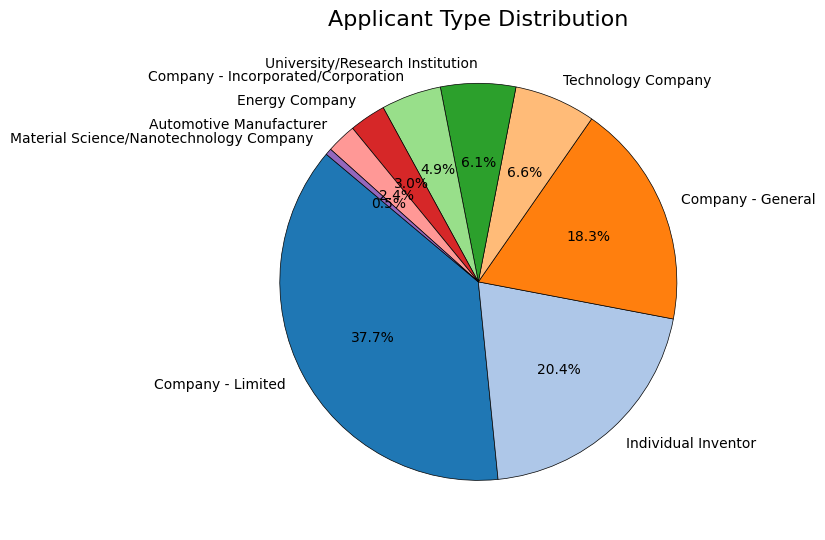

In [45]:
plt.figure(figsize=(8, 8))
plt.pie(
    applicant_type_df['Percentage'],
    labels=applicant_type_df['Applicant Type'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20.colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5}
)

plt.title('Applicant Type Distribution', fontsize=16)
plt.tight_layout()
plt.show()

In [46]:
df.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'first publication date',
       'second publication date', 'first publication number',
       'second publication number', 'first publication country',
       'second publication country', 'first filing year',
       'earliest priority year', 'applicant country', 'family_members',
       'first applicant', 'second applicant', 'first applicant type',
       'second applicant type'],
      dtype='object')

**top 10% of actors**

In [47]:

applicant_counts = applicants_df['Applicants'].value_counts()


top_10_applicants_df = applicant_counts.head(10).reset_index()
top_10_applicants_df.columns = ['Applicant', 'Patent Count'] 


#total_patents = top_10_applicants_df['Patent Count'].sum()
total_patents = applicants_df['Applicants'].count()

top_10_applicants_df['Contribution (%)'] = (top_10_applicants_df['Patent Count'] / total_patents) * 100


print("Top 10 Applicants by Number of Patents Filed with Contribution:")
top_10_applicants_df

Top 10 Applicants by Number of Patents Filed with Contribution:


,Applicant,Patent Count,Contribution (%)
0,SHANGHAI HYDROGEN MOBILE REFORMER INSTR CO LTD,9,1.570681
1,GUANGDONG HYDROGEN ENERGY SCIENCE & TECH CO LTD,8,1.396161
2,CHINA RAILWAY CONSTRUCTION CORP LTD,7,1.221640
3,CHINA RAILWAY CONSTR GROUP CO,7,1.221640
4,MITSUBISHI MOTORS CORP,7,1.221640
5,UNIV HENAN SCIENCE & TECH,7,1.221640
6,CHINA RAILWAY CONSTR GROUP CO,7,1.221640
7,YOUON TECH CO LTD,6,1.047120
8,SONY CORP,6,1.047120
9,BEIQI FOTON MOTOR CO LTD,5,0.872600


In [48]:

applicant_counts = applicants_df['Applicants'].value_counts()


top_10_applicants_df = applicant_counts.head(10).reset_index()
top_10_applicants_df.columns = ['Applicant', 'Patent Count']  


total_patents = applicants_df['Applicants'].count()


total_top_10_patents = top_10_applicants_df['Patent Count'].sum()


percentage_top_10_contribution = (total_top_10_patents / total_patents) * 100


print(f"Percentage Contribution of Top 10 Applicants: {percentage_top_10_contribution:.2f}%")
innovation_cycle = ""
if percentage_top_10_contribution >=50:
    innovation_cycle = "the innovation cycle is Ending"
elif 30 <= percentage_top_10_contribution < 50:
     innovation_cycle = "the innovation cycle is Slowing"
elif 20 <= percentage_top_10_contribution < 30:
     innovation_cycle = "the innovation cycle is Ongoing"
elif 10 <= percentage_top_10_contribution < 20:
     innovation_cycle = "the innovation cycle is Beginning"
elif percentage_top_10_contribution < 10:
     innovation_cycle = "the innovation cycle is Emmerging"

print(innovation_cycle)

Percentage Contribution of Top 10 Applicants: 12.04%
the innovation cycle is Beginning


In [49]:
# Co-Applicant Rate
#num_patents_with_multiple_applicants = df['Applicants'].str.contains('\n').sum()
num_patents_with_multiple_applicants = (df['second applicant'].notna()).sum()
total_patents = len(df)
co_applicant_rate = (num_patents_with_multiple_applicants / total_patents) * 100
print(f"Co-Applicant Rate: {co_applicant_rate:.2f}%")

Co-Applicant Rate: 15.99%


**growth rate**

In [50]:



patent_counts = df.groupby('first filing year').size().reset_index(name='Patent Count')


patent_counts['Cumulative Count'] = patent_counts['Patent Count'].cumsum()


X=patent_counts['Patent Count']
T=patent_counts['Cumulative Count']
patent_counts['GR'] = ((X- X.shift(1)) / ((T+ T.shift(1))/2)).fillna(0)


patent_counts_sorted = patent_counts.sort_values('first filing year', ascending=False)


patent_counts_sorted[['first filing year', 'Patent Count', 'GR']].head(10)


,first filing year,Patent Count,GR
32,2025,1,-0.085106
31,2024,43,-0.036055
30,2023,60,0.016667
29,2022,53,0.041265
28,2021,38,0.003145
27,2020,37,-0.007130
26,2019,39,0.008247
25,2018,37,0.048900
24,2017,27,-0.005797
23,2016,28,0.062069


In [51]:
# Filter the DataFrame for the years between 2018 and 2023
df_2018_2023 = patent_counts[(patent_counts['first filing year'] >= 2018) & (patent_counts['first filing year'] <= 2023)]

# Sum the annual growth rates (GR) for the period
growth_rate_2018_2023 = df_2018_2023['GR'].sum()*100

# Print the result
print(f"Growth Rate between 2018 and 2023 (sum of annual GR): {growth_rate_2018_2023:.2f}%")

Growth Rate between 2018 and 2023 (sum of annual GR): 11.11%


In [52]:
from datetime import date
current_year = date.today().year
start_year = current_year - 2
end_year = start_year - 5


print('current: ' , current_year , 'start : ' , start_year , 'end : ' , end_year)

current:  2025 start :  2023 end :  2018


In [53]:


df_2018_2023 = patent_counts[(patent_counts['first filing year'] >= end_year) & (patent_counts['first filing year'] <= start_year)]


    

# Sum the annual growth rates (GR) for the period
GR = df_2018_2023['GR'].sum()*100


print(f"\nGrowth Rate from {end_year} to {start_year}: {GR:.2f}%")


if GR >=50:
    print ("the technology is Booming")
elif 20 <= GR < 50:
    print ("the technology is Trending")
elif 10 <= GR < 20:
    print ("the technology is Quite_Trending")
elif 0 <= GR < 10:
    print ("the technology is Steady")
elif GR < 0:
    print ("the technology is Declining")


Growth Rate from 2018 to 2023: 11.11%
the technology is Quite_Trending


**market cost**


In [54]:
df.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'first publication date',
       'second publication date', 'first publication number',
       'second publication number', 'first publication country',
       'second publication country', 'first filing year',
       'earliest priority year', 'applicant country', 'family_members',
       'first applicant', 'second applicant', 'first applicant type',
       'second applicant type'],
      dtype='object')

In [55]:
cost = pd.read_csv('corrected-patent-cost-data.csv')

In [56]:
cost.head()

,Country,Years 0.0-1.5,Years 2.0-4.5,Years 5.0-9.5,Years 10.0-14.5,Years 15.0-20.0,Total Cost (US$)
0,US,10500,6000,11500,5000,3000,36000
1,WO,5400,4900,4100,1500,1000,16900
2,EP,7600,8900,12000,9000,5100,42600
3,KR,4000,5000,7500,8400,10500,35400
4,JP,4500,5500,6000,6500,7500,30000


In [57]:
cost.tail()

,Country,Years 0.0-1.5,Years 2.0-4.5,Years 5.0-9.5,Years 10.0-14.5,Years 15.0-20.0,Total Cost (US$)
50,CL,2500,1500,1500,1000,1000,7500
51,BD,1500,1500,1000,1000,1000,6000
52,LU,1000,1500,1000,1000,1000,5500
53,NZ,1000,1000,1500,1000,1500,6000
54,ZA,1000,1500,1000,1000,1000,5500


In [58]:
cost

,Country,Years 0.0-1.5,Years 2.0-4.5,Years 5.0-9.5,Years 10.0-14.5,Years 15.0-20.0,Total Cost (US$)
0,US,10500,6000,11500,5000,3000,36000
1,WO,5400,4900,4100,1500,1000,16900
2,EP,7600,8900,12000,9000,5100,42600
3,KR,4000,5000,7500,8400,10500,35400
4,JP,4500,5500,6000,6500,7500,30000
5,ID,1500,4500,4500,5500,6500,22500
6,VN,1500,4500,3000,4500,6500,20000
7,BR,1500,4500,3000,5500,4500,19000
8,CN,6000,5800,5200,4000,3500,24500
9,RU,1500,4500,2000,4500,5500,18000


In [59]:
import pandas as pd


reference_countries = ['FR', 'EP', 'US', 'CA', 'CN', 'IN', 'KR']


economic_groups = {
    # China-like economies 
    'BR': 'CN', 'RU': 'CN', 'VN': 'CN', 'ZA': 'CN', 'MX': 'CN', 
    'ID': 'CN', 'TR': 'CN', 'TH': 'CN', 'SA': 'CN', 'AR': 'CN',
    'CL': 'CN', 'CO': 'CN', 'PE': 'CN', 'PH': 'CN', 'EG': 'CN',
    'PK': 'CN', 'BD': 'CN', 'MA': 'CN', 'VE': 'CN',
    
    # France-like economies 
    'DE': 'FR', 'GB': 'FR', 'IT': 'FR', 'ES': 'FR', 'NL': 'FR',
    'SE': 'FR', 'CH': 'FR', 'BE': 'FR', 'AT': 'FR', 'DK': 'FR',
    'FI': 'FR', 'NO': 'FR', 'PT': 'FR', 'IE': 'FR', 'GR': 'FR',
    'CZ': 'FR', 'HU': 'FR', 'SK': 'FR', 'PL': 'FR',
    
    # Canada-like economies 
    'AU': 'CA', 'JP': 'KR', 'SG': 'KR', 'TW': 'KR', 'IL': 'KR',
    'NZ': 'CA', 'MY': 'KR', 'HK': 'KR',
    
}


for idx, row in cost.iterrows():
    country = row['Country']
    if country not in reference_countries:
        # Find the mapped reference country
        reference = economic_groups.get(country, 'CN')  
        # Copy costs from the reference country
        ref_row = cost[cost['Country'] == reference].iloc[0]
        cost.loc[idx, 'Years 0.0-1.5':'Total Cost (US$)'] = ref_row['Years 0.0-1.5':'Total Cost (US$)']
        

In [60]:
import pandas as pd
from datetime import datetime

current_year = datetime.now().year


df['Patent Age'] = current_year - df['earliest priority year']


df['Patent Age'] = df['Patent Age'].apply(lambda x: max(0, x) if pd.notnull(x) else x)

In [61]:
df.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'first publication date',
       'second publication date', 'first publication number',
       'second publication number', 'first publication country',
       'second publication country', 'first filing year',
       'earliest priority year', 'applicant country', 'family_members',
       'first applicant', 'second applicant', 'first applicant type',
       'second applicant type', 'Patent Age'],
      dtype='object')

In [62]:
def assign_cost(row, cost_df):
    country = row['first publication country']
    age = row['Patent Age']
    
    cost_row = cost_df[cost_df['Country'] == country]
    
    if not cost_row.empty:
        
        cost_columns = [
            'Years 0.0-1.5',
            'Years 2.0-4.5', 
            'Years 5.0-9.5',
            'Years 10.0-14.5',
            'Years 15.0-20.0'
        ]
        
        if age > 20:
            return cost_row['Total Cost (US$)'].values[0]
        elif age <= 1.5:
            return cost_row[cost_columns[0]].values[0]
        else:
            # Calculate cumulative sum up to current age bracket
            bracket_index = next(i for i, limit in enumerate([1.5, 4.5, 9.5, 14.5, 20.0]) if age <= limit)
            return cost_row[cost_columns[:bracket_index+1]].sum(axis=1).values[0]
    else:
        return None


In [63]:
df['patent cost'] = df.apply(lambda row: assign_cost(row, cost), axis=1)

# 4. Handle remaining cases
df['patent cost'] = df['patent cost'].fillna(0).astype(int)

In [64]:
df.head(2)

,No,Title,Inventors,Applicants,Publication number,Earliest priority,IPC,CPC,Publication date,Earliest publication,...,first filing year,earliest priority year,applicant country,family_members,first applicant,second applicant,first applicant type,second applicant type,Patent Age,patent cost
0,1,Plug-in hybrid vehicle with fast energy storage,BENDER DONALD A [US] \nDESHMANE ATUL [US] \nME...,AFS TRINITY POWER CORP [US],US2006250902A1,2005-05-05,[H04B1/20],"[B60K6/20 (KR), B60K6/28 (KR), B60K6/30 (EP,US...",2006-11-09,2006-11-09,...,2006,2005,US,[],AFS TRINITY POWER CORP [US],None,Company - General,Unknown,20,36000
1,2,Electric vehicle wireless charging system thro...,SON JEONG KI [KR],SON JEONG KI [KR],KR20230163874A,2022-05-24,"[B60L53/12, B60L53/38, B60L53/54, B60L53/66, B...","[B60L53/12 (KR), B60L53/38 (KR), B60L53/54 (KR...",2023-12-01,2023-12-01,...,2023,2022,KR,[],SON JEONG KI [KR],None,Individual Inventor,Unknown,3,9000


df = df.drop('Assigned Cost' , axis= 1)

In [65]:
df.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'first publication date',
       'second publication date', 'first publication number',
       'second publication number', 'first publication country',
       'second publication country', 'first filing year',
       'earliest priority year', 'applicant country', 'family_members',
       'first applicant', 'second applicant', 'first applicant type',
       'second applicant type', 'Patent Age', 'patent cost'],
      dtype='object')

**originality rate** (IPC&Originality_Rate notebook)

In [66]:
OR_df = df.head(30)
#OR_df.to_csv('OR_df.csv' , index=False)

In [67]:
from bs4 import BeautifulSoup
import pandas as pd
import time
import random
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

class EspacenetScraper:
    def __init__(self, headless=True):
        """Initialize the scraper with configurable options."""
        options = uc.ChromeOptions()
        if headless:
            options.add_argument('--headless')  # Run in headless mode

        options.add_argument('--disable-blink-features=AutomationControlled')
        self.driver = uc.Chrome(options=options)
        self.driver.set_page_load_timeout(30)
        self.driver.set_window_size(1600, 1300)

    def add_random_delay(self, min_seconds=1, max_seconds=3):
        """Add a random delay to mimic human behavior."""
        time.sleep(random.uniform(min_seconds, max_seconds))

    def get_page_html(self, url, retries=3):
        """
        Navigate to the given URL and return the page HTML.
        Retry the operation if a timeout occurs.

        Args:
            url (str): The URL to navigate to.
            retries (int): Number of retry attempts.

        Returns:
            str: The page HTML, or None if all retries fail.
        """
        for attempt in range(retries):
            try:
                print(f"Navigating to: {url} (Attempt {attempt + 1})")
                self.driver.get(url)
                WebDriverWait(self.driver, 30).until(
                    EC.presence_of_element_located((By.TAG_NAME, "body"))
                )

                # Add a random delay to mimic human behavior
                self.add_random_delay(3, 5)

                # Return the page HTML
                return self.driver.page_source

            except TimeoutException:
                print(f"Timed out waiting for the page to load. Retrying ({attempt + 1}/{retries})...")
                if attempt == retries - 1:
                    print("Max retries reached. Unable to load the page.")
                    return None
            except Exception as e:
                print(f"An error occurred: {e}")
                return None

    def click_citations_tab_and_get_html(self, retries=3):
        """
        Click the "Citations" tab and return the HTML content of the table's tbody.
        If no citations are found (error message is present), return None.

        Args:
            retries (int): Number of retry attempts.

        Returns:
            str or None: The HTML content of the table's tbody, or None if no citations are found.
        """
        for attempt in range(retries):
            try:
                # Wait for the "Citations" tab to be clickable
                citations_tab = WebDriverWait(self.driver, 30).until(
                    EC.element_to_be_clickable((By.XPATH, "//li[@role='tab']//span[contains(text(), 'Citations')]"))
                )
                print("Citations tab found. Clicking...")
                citations_tab.click()
                self.add_random_delay(2, 4)

                # Wait for the wrapper to load
                WebDriverWait(self.driver, 30).until(
                    EC.presence_of_element_located((By.CSS_SELECTOR, "div.wrapper--m6N288zA"))
                )
                print("Wrapper found.")

                # Check if the table exists inside the wrapper
                table = self.driver.find_elements(By.CSS_SELECTOR, "div.wrapper--m6N288zA table.table__table--8dvWEm4j")
                if table:
                    print("Table found inside the wrapper.")
                    # Wait for the table's tbody to load
                    WebDriverWait(self.driver, 30).until(
                        EC.presence_of_element_located((By.CSS_SELECTOR, "table.table__table--8dvWEm4j tbody.table__body--wKJVkwCZ"))
                    )
                    print("Table body found.")

                    # Add a delay to ensure the table is fully rendered
                    self.add_random_delay(2, 4)

                    # Extract the HTML content of the table's tbody
                    tbody = self.driver.find_element(By.CSS_SELECTOR, "table.table__table--8dvWEm4j tbody.table__body--wKJVkwCZ")
                    return tbody.get_attribute("outerHTML")
                else:
                    # Check if the error message exists
                    error_message = self.driver.find_elements(By.CSS_SELECTOR, "div.wrapper--m6N288zA div.error__container--85Brg4Ek")
                    if error_message:
                        print("No citations found for this patent.")
                        return None  # Return None if no citations are found
                    else:
                        print("Neither table nor error message found. Retrying...")
                        continue  # Retry the loop

            except TimeoutException:
                print(f"Timed out waiting for the 'Citations' tab to load. Retrying ({attempt + 1}/{retries})...")
                if attempt == retries - 1:
                    print("Max retries reached. Unable to load the 'Citations' tab.")
                    return None
            except Exception as e:
                print(f"An error occurred while clicking the 'Citations' tab: {e}")
                return None

    def parse_tbody_to_dataframe(self, tbody_html):
        """
        Parse the tbody HTML and convert it into a pandas DataFrame.

        Args:
            tbody_html (str): The HTML content of the tbody.

        Returns:
            pd.DataFrame: A DataFrame containing the extracted data.
        """
        soup = BeautifulSoup(tbody_html, 'html.parser')
        rows = soup.find_all('tr', class_='table__row--qDMbhLBz')

        data = []
        for row in rows:
            cells = row.find_all('td', class_='table__cell--9cdFfes6')
            row_data = []
            for cell in cells:
                # Extract text from the span if it exists, otherwise extract text from the cell
                span = cell.find('span')
                if span:
                    row_data.append(span.get_text(strip=True))
                else:
                    row_data.append(cell.get_text(strip=True))
            data.append(row_data)

        # Define column names based on the table structure
        columns = [
            "CitationOrigin", "Publication", "Title", "Earliest PriorityDate",
            "PublicationDate", "Applicants", "IPC", "CPC"
        ]

        # Create a DataFrame
        df = pd.DataFrame(data, columns=columns)
        return df

    def close(self):
        """Close the browser when done."""
        if self.driver:
            self.driver.quit()


if __name__ == '__main__':

    #df = pd.read_csv('OR_df_exp.csv')  # Replace with your actual file path
    
    # Make sure the DataFrame has the required columns
    required_columns = ['Family number', 'first publication number']
    if not all(col in OR_df.columns for col in required_columns):
        raise ValueError(f"Input DataFrame must contain these columns: {required_columns}")
    
    # Initialize the scraper
    scraper = EspacenetScraper(headless=False)  # Set headless to False to see the browser in action

    # Create a new empty DataFrame to store the results
    # Initialize with the same columns as the input DataFrame plus the new 'citations IPC' column
    result_or_df = pd.DataFrame(columns=df.columns.tolist() + ['citations IPC'])

    # Counter to keep track of non-empty lists in the 'citations IPC' column
    non_empty_count = 0

    try:
        # Iterate over each row in the original DataFrame
        for index, row in OR_df.iterrows():
            # Stop if we have at least 30 rows with non-empty citations
            if non_empty_count >= 30:
                break

            # Construct the URL for the current patent
            url = f"https://worldwide.espacenet.com/patent/search/family/{row['Family number']}/publication/{row['first publication number']}?q=pn%3D{row['first publication number']}"
            print(f"Processing patent: {row['first publication number']}")

            # Get the page HTML
            html = scraper.get_page_html(url, retries=3)
            if html:
                print("Page HTML retrieved successfully.")

                # Click the "Citations" tab and get its HTML content
                tbody_html = scraper.click_citations_tab_and_get_html(retries=3)
                if tbody_html:
                    print(f"Citations tab tbody HTML retrieved successfully for {row['first publication number']}.")

                    # Parse the tbody HTML and convert it into a DataFrame
                    citations_df = scraper.parse_tbody_to_dataframe(tbody_html)
                    if citations_df is not None and not citations_df.empty:  # Check if citations were found
                        print(f"DataFrame created successfully for {row['first publication number']}.")

                        # Extract the IPC classes from the citations DataFrame
                        ipc_list = citations_df["IPC"].tolist()

                        # Create a new row as a dictionary
                        new_row = row.to_dict()
                        new_row['citations IPC'] = ipc_list

                        # Append the row to the result DataFrame - FIX FOR THE ERROR
                        # Create a temporary DataFrame with the new row and ensure index is unique
                        temp_df = pd.DataFrame([new_row])
                        result_or_df = pd.concat([result_or_df, temp_df], ignore_index=True)

                        # Increment the non-empty count
                        non_empty_count += 1
                        print(f"Added patent {row['first publication number']} with {len(ipc_list)} citation IPCs. Total with citations: {non_empty_count}")
                    else:
                        print(f"No citations found for {row['first publication number']}.")
                else:
                    print(f"No citations found for {row['first publication number']}.")

    finally:
        # Close the browser
        scraper.close()
        print("Scraper closed.")

        # Display the resulting DataFrame
        if not result_or_df.empty:
            print(result_or_df[['first publication number', 'citations IPC']])


            # Save the resulting DataFrame to a CSV file
            #result_df.to_csv("patents_with_citations_ipc.csv", index=False, encoding="utf-8")
            #print("DataFrame saved to 'patents_with_citations_ipc.csv'.")
        else:
            print("No results collected. Result DataFrame is empty.")

Processing patent: US2006250902A1
Navigating to: https://worldwide.espacenet.com/patent/search/family/37397092/publication/US2006250902A1?q=pn%3DUS2006250902A1 (Attempt 1)
Page HTML retrieved successfully.
Timed out waiting for the 'Citations' tab to load. Retrying (1/3)...
Timed out waiting for the 'Citations' tab to load. Retrying (2/3)...
Timed out waiting for the 'Citations' tab to load. Retrying (3/3)...
Max retries reached. Unable to load the 'Citations' tab.
No citations found for US2006250902A1.
Processing patent: KR20230163874A
Navigating to: https://worldwide.espacenet.com/patent/search/family/89124565/publication/KR20230163874A?q=pn%3DKR20230163874A (Attempt 1)
Page HTML retrieved successfully.
Citations tab found. Clicking...
Timed out waiting for the 'Citations' tab to load. Retrying (1/3)...
Citations tab found. Clicking...
Wrapper found.
Table found inside the wrapper.
Table body found.
Citations tab tbody HTML retrieved successfully for KR20230163874A.
DataFrame created

C:\Users\tasni\AppData\Local\Temp\ipykernel_56760\1552300663.py:221: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_or_df = pd.concat([result_or_df, temp_df], ignore_index=True)


Page HTML retrieved successfully.
Citations tab found. Clicking...
Wrapper found.
Table found inside the wrapper.
Table body found.
Citations tab tbody HTML retrieved successfully for KR102511391B1.
DataFrame created successfully for KR102511391B1.
Added patent KR102511391B1 with 5 citation IPCs. Total with citations: 2
Processing patent: WO2011019133A2
Navigating to: https://worldwide.espacenet.com/patent/search/family/42183715/publication/WO2011019133A2?q=pn%3DWO2011019133A2 (Attempt 1)
Page HTML retrieved successfully.
Citations tab found. Clicking...
Wrapper found.
No citations found for this patent.
No citations found for WO2011019133A2.
Processing patent: US2022140365A1
Navigating to: https://worldwide.espacenet.com/patent/search/family/75243546/publication/US2022140365A1?q=pn%3DUS2022140365A1 (Attempt 1)
Page HTML retrieved successfully.
Citations tab found. Clicking...
Wrapper found.
Table found inside the wrapper.
Table body found.
Citations tab tbody HTML retrieved successful

In [68]:
def process_citations(citations):
    # Initialize a set to store unique citations
    processed = set()
    
    # Iterate over each citation string
    for citation in citations:
        # Split the citation string by commas
        parts = citation.split(',')
        # Add each part to the set (strip whitespace)
        for part in parts:
            # Split by '/' and take the first part, then strip whitespace
            processed.add(part.split('/')[0].strip())

    unique_citaions = list(processed)
    unique_citaions.sort()
    
    # Convert the set back to a list
    return unique_citaions

In [69]:
result_or_df['citations IPC'] = result_or_df['citations IPC'].apply(process_citations)
result_or_df.head()

,No,Title,Inventors,Applicants,Publication number,Earliest priority,IPC,CPC,Publication date,Earliest publication,...,earliest priority year,applicant country,family_members,first applicant,second applicant,first applicant type,second applicant type,Patent Age,patent cost,citations IPC
0,2,Electric vehicle wireless charging system thro...,SON JEONG KI [KR],SON JEONG KI [KR],KR20230163874A,2022-05-24,"[B60L53/12, B60L53/38, B60L53/54, B60L53/66, B...","[B60L53/12 (KR), B60L53/38 (KR), B60L53/54 (KR...",2023-12-01,2023-12-01,...,2022,KR,[],SON JEONG KI [KR],None,Individual Inventor,Unknown,3,9000,"[B60L11, B60L53, B60M7, F16H7, G06Q50, H01M10,..."
1,3,Electric vehicle charging system using hydroge...,HONG SEONG HO,HOGREENAIR CO LTD [KR],KR102511391B1,2022-09-20,"[B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...",[Y02T10/70 (EP)],2023-03-20,2023-03-20,...,2022,KR,[KR102511391B1],HOGREENAIR CO LTD [KR],None,Company - Limited,Unknown,3,9000,"[B60K15, B60L3, B60L50, B60L53, B60P3, C25B1, ..."
2,5,ESS SYSTEM FOR CHARGING FUEL CELL ELECTRIC VEH...,MUN TAEEUN [KR] \nCHAE HO BYUNG [KR] \nSHIN JO...,SIGNET EV INC [KR] \nSIGNET ENERGY [KR],US2022140365A1,2020-11-02,"[H01M16/00, H01M8/04828, H02J7/34]","[B60K15/03006 (KR), B60L53/20 (KR), B60L53/50 ...",2022-05-05,2021-03-17,...,2020,KR,"[JP2022073928A, ;, KR102228132B1, ;, US2022140...",SIGNET EV INC [KR],SIGNET ENERGY [KR],Company - Incorporated/Corporation,Energy Company,5,28000,"[B60L50, B60L53, B60S5, B64B1, B64C39, B64D27,..."
3,6,Method for quickly charging electric vehicle l...,CHENG HUANGREN \nHAN YIXI \nLI QINGBAO \nZHAO XI,TIANJIN YADI IND CO LTD,CN108550935A,2018-04-19,[H01M10/44],"[H01M10/445 (CN), Y02E60/10 (EP)]",2018-09-18,2018-09-18,...,2018,NaN,[CN108550935A],TIANJIN YADI IND CO LTD,None,Company - Limited,Unknown,7,17000,"[H01M10, H02J7]"
4,7,Stable Charging Device for Methanol Hydrogen P...,CHEN JIEPING,ZHEJIANG QINGGU NEW ENERGY AUTOMOBILE CO LTD,CN109263516A \nCN109263516B,2018-10-30,"[B60L58/31, H01M8/04082, H01M8/0612]","[H01M8/04201 (CN), H01M8/0618 (CN), H01M8/0625...",2019-01-25 \n2024-03-15,2019-01-25,...,2018,NaN,[],ZHEJIANG QINGGU NEW ENERGY AUTOMOBILE CO LTD,None,Company - Limited,Unknown,7,17000,"[, B60L1, B60L11, B60L15, B60L50, B60L58, H01M..."


In [70]:
def process_ipc_codes(ipc_list):
    """
    Process a list of IPC codes with country codes in parentheses.
    
    Args:
        ipc_list (list or str): A list of IPC codes in the format "CODE (COUNTRY)" or a string
                               representation of such a list.
                               
    Returns:
        list: The original list without any modifications.
    
    Example:
        >>> input_list = ["H01M8/04201 (CN)", "H01M8/0618 (CN)", "H01M8/0625 (CN)", 
                          "Y02E60/50 (EP)", "Y02T90/40 (EP)"]
        >>> process_ipc_codes(input_list)
        ['H01M8/04201 (CN)', 'H01M8/0618 (CN)', 'H01M8/0625 (CN)', 'Y02E60/50 (EP)', 'Y02T90/40 (EP)']
    """
    # If the input is a string (as might happen if extracted from text),
    # convert it to a list by parsing the string
    if isinstance(ipc_list, str):
        # Check if it's a string representation of a list (starts with [ and ends with ])
        if ipc_list.strip().startswith('[') and ipc_list.strip().endswith(']'):
            # Remove the brackets and split by commas
            # Use eval carefully - only if you're sure the input is safe
            try:
                ipc_list = eval(ipc_list)
            except:
                # If eval fails, do a simple string split and clean up
                content = ipc_list.strip()[1:-1]  # Remove brackets
                ipc_list = [item.strip().strip("'\"") for item in content.split(',')]
    
    # Ensure the result is a list
    if not isinstance(ipc_list, list):
        ipc_list = [ipc_list]
    
    # Return the original list (as per your request)
    return ipc_list

# Example usage:
if __name__ == "__main__":
    input_list = ["H01M8/04201 (CN)", "H01M8/0618 (CN)", "H01M8/0625 (CN)", 
                  "Y02E60/50 (EP)", "Y02T90/40 (EP)"]
    result = process_ipc_codes(input_list)
    print(result)
    
    # Test with a string input
    string_input = "['H01M8/04201 (CN)', 'H01M8/0618 (CN)', 'H01M8/0625 (CN)', 'Y02E60/50 (EP)', 'Y02T90/40 (EP)']"
    result2 = process_ipc_codes(string_input)
    print(result2)

['H01M8/04201 (CN)', 'H01M8/0618 (CN)', 'H01M8/0625 (CN)', 'Y02E60/50 (EP)', 'Y02T90/40 (EP)']
['H01M8/04201 (CN)', 'H01M8/0618 (CN)', 'H01M8/0625 (CN)', 'Y02E60/50 (EP)', 'Y02T90/40 (EP)']


In [71]:
result = process_citations(result)
result

['H01M8', 'Y02E60', 'Y02T90']

In [72]:
result_or_df['IPC'] = result_or_df['IPC'].apply(process_ipc_codes)
result_or_df['IPC'] = result_or_df['IPC'].apply(process_citations)
result_or_df['CPC'] = result_or_df['CPC'].apply(process_ipc_codes)
result_or_df['CPC'] = result_or_df['CPC'].apply(process_citations)

In [73]:
result_or_df['IPC'].head(2)

0                 [B60L53, G06Q20, G06Q50]
1    [B60L3, B60L53, B60L58, H01M8, H05K7]
Name: IPC, dtype: object

In [74]:
citations_IPC_df= result_or_df[['first publication number','IPC','citations IPC']]
citations_IPC_df['IPC count']= citations_IPC_df['IPC'].apply(len)
citations_IPC_df['citations IPC count']= citations_IPC_df['citations IPC'].apply(len)

C:\Users\tasni\AppData\Local\Temp\ipykernel_56760\2742703499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  citations_IPC_df['IPC count']= citations_IPC_df['IPC'].apply(len)
C:\Users\tasni\AppData\Local\Temp\ipykernel_56760\2742703499.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  citations_IPC_df['citations IPC count']= citations_IPC_df['citations IPC'].apply(len)


In [75]:
#check empty rows
citations_IPC_df['%citaions'] = citations_IPC_df['IPC count'] / citations_IPC_df['citations IPC count']

C:\Users\tasni\AppData\Local\Temp\ipykernel_56760\3938304385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  citations_IPC_df['%citaions'] = citations_IPC_df['IPC count'] / citations_IPC_df['citations IPC count']


In [100]:
#remove rows in whitch IPC count > citations IPC count
citations_IPC_df = citations_IPC_df[citations_IPC_df['IPC count'] <= citations_IPC_df['citations IPC count']]

In [101]:
citations_IPC_df

,first publication number,IPC,citations IPC,IPC count,citations IPC count,%citaions,%S²
0,KR20230163874A,"[B60L53, G06Q20, G06Q50]","[B60L11, B60L53, B60M7, F16H7, G06Q50, H01M10,...",3,8,0.375000,0.140625
1,KR102511391B1,"[B60L3, B60L53, B60L58, H01M8, H05K7]","[B60K15, B60L3, B60L50, B60L53, B60P3, C25B1, ...",5,15,0.333333,0.111111
2,US2022140365A1,"[H01M16, H01M8, H02J7]","[B60L50, B60L53, B60S5, B64B1, B64C39, B64D27,...",3,22,0.136364,0.018595
3,CN108550935A,[H01M10],"[H01M10, H02J7]",1,2,0.500000,0.250000
4,CN109263516A,"[B60L58, H01M8]","[, B60L1, B60L11, B60L15, B60L50, B60L58, H01M...",2,9,0.222222,0.049383
5,US2013093378A1,[H02J7],"[B60L11, B60L8, B63C7, B63H11, B63H13, B63H21,...",1,27,0.037037,0.001372
6,CN112606713A,"[B60L50, B60L58, H02J7, H02P27]","[B60K1, B60L11, B60L50, B60L58, B60L7, H01M10,...",4,10,0.400000,0.160000
7,WO2023128748A1,"[B60K6, B60L15, B60L53, B60L58]","[B01J19, B01J7, B60K1, B60L1, B60L11, B60L58, ...",4,15,0.266667,0.071111
9,CN108674229A,"[B60L50, B60L53, B60S5, H02J7]","[B60C19, B60K15, B60L11, B60S5, B65B1, B65B3, ...",4,17,0.235294,0.055363
10,KR102511398B1,"[B60L3, B60L53, B60L58, H01M8, H05K7]","[B60K15, B60L3, B60L50, B60L53, B60P3, F17C11,...",5,11,0.454545,0.206612


In [152]:
#originality rate calculation 
citations_IPC_df['%S²'] = citations_IPC_df['%citaions']**2
mean_S_square = citations_IPC_df['%S²'].sum()
num_rows = len(citations_IPC_df)
original_rate = 1- mean_S_square/num_rows
print('num rows = ' , num_rows)
print('OR = ' ,' {:.2f}%'.format(original_rate) )

num rows =  14
OR =   0.91%


**family analysis**

family_df = pd.read_csv('family_df.csv')
family_df = family_df.drop('Unnamed: 0' , axis= 1)
family_df.columns

In [175]:
family_df= df.copy()

In [176]:
df['family_members']

0                                                     []
1                                                     []
2                                        [KR102511391B1]
3      [KR100949260B1, ;, WO2011019133A2, ;, WO201101...
4      [JP2022073928A, ;, KR102228132B1, ;, US2022140...
                             ...                        
489                                       [CN109649552A]
490    [CN102738501A, ;, JP2012221898A, ;, US20122653...
491                                       [CN104915484A]
492                                       [CN117002337A]
493                                       [CN114132222A]
Name: family_members, Length: 494, dtype: object

In [177]:
# 1. Calculate number of family members per row
family_df['family_members_count'] = family_df['family_members'].str.len()

# 2. Calculate total across all patents
total_family_members = family_df['family_members_count'].sum()

print(f"Total family members across all patents: {total_family_members}")


Total family members across all patents: 1220


***market strategy***

In [178]:
import pandas as pd


market_value = df['patent cost'].sum()


df['Patent Value'] = df['patent cost']
#fix market rate
market_rate = total_family_members / len(df)

Patent_Value=market_value/len(df)

print(f"Market Value: ${market_value:,.2f}")
print(f"Market Rate: ${market_rate:,.2f} per patent")
print(f"Mean Value of Patents: ${Patent_Value:,.2f}")



Market Value: $9,350,000.00
Market Rate: $2.47 per patent
Mean Value of Patents: $18,927.13


In [179]:
len(family_df)

494

In [180]:
import pandas as pd
import numpy as np
family_df_copy = family_df.copy()



In [181]:
family_df_copy = family_df_copy.dropna(subset=['family_members'])


In [182]:
family_df_copy = family_df_copy[family_df_copy['family_members'].apply(lambda x: len(x) > 0)]


In [183]:
family_df_copy.head(2)

,No,Title,Inventors,Applicants,Publication number,Earliest priority,IPC,CPC,Publication date,Earliest publication,...,first applicant,second applicant,first applicant type,second applicant type,Patent Age,patent cost,Patent Value,Country,Publication Year,family_members_count
2,3,Electric vehicle charging system using hydroge...,HONG SEONG HO,HOGREENAIR CO LTD [KR],KR102511391B1,2022-09-20,"[B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...",[Y02T10/70 (EP)],2023-03-20,2023-03-20,...,HOGREENAIR CO LTD [KR],None,Company - Limited,Unknown,3,9000,9000,KR,2023.0,1
3,4,BATTERY-CHARGING SYSTEM FOR AN ELECTRIC VEHICLE,CHUNG YON JONG [KR],CHUNG YON JONG [KR],WO2011019133A2 \nWO2011019133A3,2009-08-13,"[B60L11/18, B60W10/24, H02J7/00]","[B60K6/46 (EP), B60L15/2045 (EP), B60L58/12 (E...",2011-02-17 \n2011-04-07,2010-03-25,...,CHUNG YON JONG [KR],None,Individual Inventor,Unknown,16,24500,24500,WO,NaN,5


In [184]:
family_df_copy = family_df_copy[family_df_copy['family_members'] != ';']

In [185]:
# Inspect the first few rows of the 'family_members' column
print(family_df_copy['family_members'].head())

2                                      [KR102511391B1]
3    [KR100949260B1, ;, WO2011019133A2, ;, WO201101...
4    [JP2022073928A, ;, KR102228132B1, ;, US2022140...
5                                       [CN108550935A]
7                                     [US2013093378A1]
Name: family_members, dtype: object


In [187]:
import re
import ast

def extract_country_codes(family_data):
    """
    Extract country codes from the family_members column.
    Handles both string representations of lists and actual lists.
    """
    # If the input is a string representation of a list
    if isinstance(family_data, str):
        # Check if it's an empty list string
        if family_data == '[]':
            return []
        # Use the string-based extraction function
        return extract_country_codes_from_str(family_data)
    
    # If the input is an actual list
    elif isinstance(family_data, list):
        # Use the list-based extraction function
        return extract_country_codes_from_list(family_data)
    
    # If the input is neither, return an empty list
    return []

def extract_country_codes_from_str(family_str):
    """
    Extract country codes from a string representation of a list.
    """
    if not isinstance(family_str, str) or family_str == '[]':
        return []
    
    # This pattern finds anything that looks like a patent number within quotes
    pattern = r"'([A-Z]{2}[A-Z0-9]+)'"
    matches = re.findall(pattern, family_str)
    
    # Extract the first two characters for country codes
    country_codes = [match[:2] for match in matches]
    return country_codes

def extract_country_codes_from_list(family_members):
    """
    Extract country codes from an actual list of patent numbers.
    """
    if not isinstance(family_members, list) or not family_members:
        return []
    
    # This pattern extracts the 2-letter country code from patent numbers
    country_codes = []
    for item in family_members:
        if isinstance(item, str):  # Ensure the item is a string
            match = re.match(r'^([A-Z]{2})[A-Z0-9]+', item)  # Match the first 2 letters
            if match:
                country_codes.append(match.group(1))  # Append the country code
    return country_codes

In [188]:
family_df_copy['country_codes'] = family_df_copy['family_members'].apply(extract_country_codes)

# Inspect the results
family_df_copy[['family_members', 'country_codes']].sample(5)

,family_members,country_codes
195,[CN114865002A],[CN]
416,"[CN116720879A, ;, CN116720879B]","[CN, CN]"
141,[JPH0773907A],[JP]
74,[CN114567009A],[CN]
103,"[KR102450193B1, ;, US12224615B2, ;, US20232464...","[KR, US, US, WO]"


In [192]:
import ast

def clean_family_members(family_data):
    """
    Clean the family_members column:
    - Convert string representations of lists to actual lists.
    - Remove semicolons and empty strings.
    """
    # If the input is a string, try to evaluate it as a list
    if isinstance(family_data, str):
        try:
            family_data = ast.literal_eval(family_data)  # Convert string to list
        except (ValueError, SyntaxError):
            # If evaluation fails, treat it as a single-item list
            family_data = [family_data]
    
    # If the input is already a list, proceed
    if isinstance(family_data, list):
        # Remove semicolons and empty strings
        cleaned_list = [item.replace(';', '') for item in family_data if item.replace(';', '') != '']
        return cleaned_list
    
    # If the input is neither a string nor a list, return an empty list
    return []

# Apply the cleaning function to the family_members column
family_df_copy['family_members'] = family_df_copy['family_members'].apply(clean_family_members)

# Inspect the results
family_df_copy[['family_members']].sample(5)

,family_members
90,"[CN112986836A, CN112986836B]"
364,"[CN109064656A, CN109064656B]"
373,[CN110803091A]
353,[KR102586978B1]
280,[CN208827571U]


In [197]:
family_df_copy[['family_members', 'country_codes']].iloc[255]

family_members    [KR20150067485A]
country_codes                 [KR]
Name: 311, dtype: object

In [198]:
family_df_copy.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'first publication date',
       'second publication date', 'first publication number',
       'second publication number', 'first publication country',
       'second publication country', 'first filing year',
       'earliest priority year', 'applicant country', 'family_members',
       'first applicant', 'second applicant', 'first applicant type',
       'second applicant type', 'Patent Age', 'patent cost', 'Patent Value',
       'Country', 'Publication Year', 'family_members_count', 'country_codes'],
      dtype='object')

In [199]:
family_df.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'first publication date',
       'second publication date', 'first publication number',
       'second publication number', 'first publication country',
       'second publication country', 'first filing year',
       'earliest priority year', 'applicant country', 'family_members',
       'first applicant', 'second applicant', 'first applicant type',
       'second applicant type', 'Patent Age', 'patent cost', 'Patent Value',
       'Country', 'Publication Year', 'family_members_count'],
      dtype='object')

In [200]:
family_df_copy['family_size'] = family_df_copy['family_members'].apply(len)
print(family_df_copy[['Publication number', 'family_size']].head())

                Publication number  family_size
2                    KR102511391B1            1
3  WO2011019133A2 \nWO2011019133A3            3
4                   US2022140365A1            3
5                     CN108550935A            1
7                   US2013093378A1            1


In [201]:
unique_family_members = set(item for sublist in family_df_copy['family_members'] for item in sublist)
print(f"Total unique family members: {len(unique_family_members)}")

Total unique family members: 818


Relationship between filing countries and family countries

In [202]:
import pandas as pd


all_country_codes = [code for sublist in family_df_copy['country_codes'] for code in sublist]


family_counts_df = pd.Series(all_country_codes).value_counts().reset_index()
family_counts_df.columns = ['country_code', 'member_count']


C:\Users\tasni\AppData\Local\Temp\ipykernel_56760\1863737735.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country_code', y='member_count', data=family_counts_df, palette='viridis')


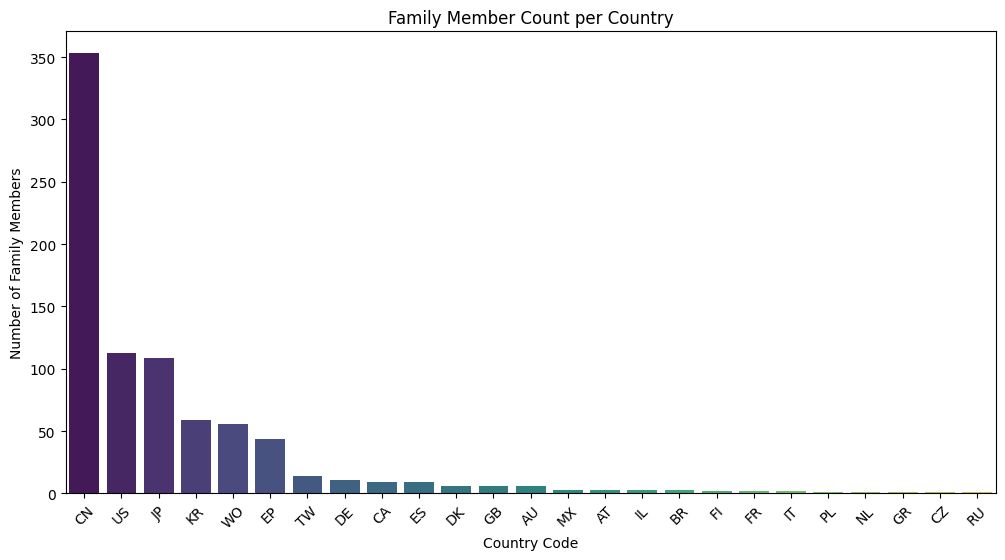

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))


sns.barplot(x='country_code', y='member_count', data=family_counts_df, palette='viridis')

plt.xlabel('Country Code')
plt.ylabel('Number of Family Members')
plt.title('Family Member Count per Country')
plt.xticks(rotation=45)  

plt.show()


market rate : toatl fam / total first filing

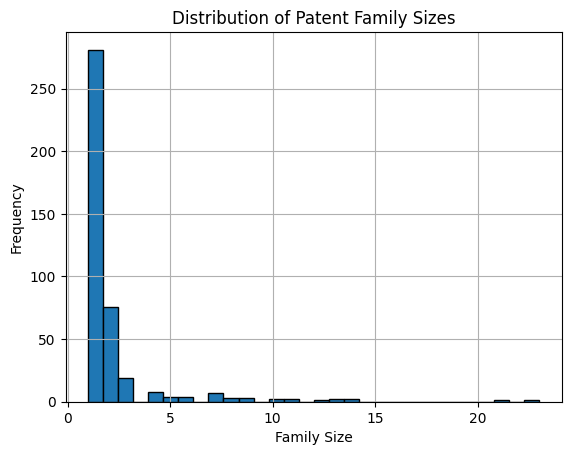

In [204]:
import matplotlib.pyplot as plt

# Plot the distribution of family sizes
family_df_copy['family_size'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Patent Family Sizes')
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.show()

In [205]:
# Calculate filing counts by country
country_counts = pd.DataFrame(df['first publication country'].value_counts()).reset_index()
country_counts.columns = ['Country', 'Filing Counts']

# Display the resulting DataFrame
print(country_counts)


   Country  Filing Counts
0       CN            305
1       US             67
2       JP             53
3       KR             36
4       WO             20
5       TW              3
6       GB              3
7       EP              3
8       ES              1
9       RU              1
10      AU              1
11      DK              1


country_counts['filing counts'] = df['first publication country'].value_counts().reset_index()

In [206]:
country_counts.head()

,Country,Filing Counts
0,CN,305
1,US,67
2,JP,53
3,KR,36
4,WO,20


In [207]:
patent_counts.head()

,first filing year,Patent Count,Cumulative Count,GR
0,1990,3,3,0.000000
1,1991,1,4,-0.571429
2,1993,1,5,0.000000
3,1995,1,6,0.000000
4,1996,2,8,0.142857


**visualisations and plots**


In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

In [209]:
df.head(1)

,No,Title,Inventors,Applicants,Publication number,Earliest priority,IPC,CPC,Publication date,Earliest publication,...,family_members,first applicant,second applicant,first applicant type,second applicant type,Patent Age,patent cost,Patent Value,Country,Publication Year
0,1,Plug-in hybrid vehicle with fast energy storage,BENDER DONALD A [US] \nDESHMANE ATUL [US] \nME...,AFS TRINITY POWER CORP [US],US2006250902A1,2005-05-05,[H04B1/20],"[B60K6/20 (KR), B60K6/28 (KR), B60K6/30 (EP,US...",2006-11-09,2006-11-09,...,[],AFS TRINITY POWER CORP [US],None,Company - General,Unknown,20,36000,36000,US,2006.0


In [210]:
applicant_counts

Applicants
SHANGHAI HYDROGEN MOBILE REFORMER INSTR CO LTD         9
GUANGDONG HYDROGEN ENERGY SCIENCE & TECH CO LTD        8
CHINA RAILWAY CONSTRUCTION CORP LTD                    7
CHINA RAILWAY CONSTR GROUP CO                          7
MITSUBISHI MOTORS CORP                                 7
                                                      ..
INST ELECTRICAL ENG CAS                                1
BEIJING MEIYINLANGTIAN NEW ENERGY AUTOMOBILE CO LTD    1
SUZHOU DSM GREEN POWER LTD [CN]                        1
GM GLOBAL TECH OPERATIONS LLC [US]                     1
SHANGHAI SHANJIERENYI INFORMATION TECH CO LTD          1
Name: count, Length: 412, dtype: int64

In [211]:
top_10_applicants_df

,Applicant,Patent Count
0,SHANGHAI HYDROGEN MOBILE REFORMER INSTR CO LTD,9
1,GUANGDONG HYDROGEN ENERGY SCIENCE & TECH CO LTD,8
2,CHINA RAILWAY CONSTRUCTION CORP LTD,7
3,CHINA RAILWAY CONSTR GROUP CO,7
4,MITSUBISHI MOTORS CORP,7
5,UNIV HENAN SCIENCE & TECH,7
6,CHINA RAILWAY CONSTR GROUP CO,7
7,YOUON TECH CO LTD,6
8,SONY CORP,6
9,BEIQI FOTON MOTOR CO LTD,5


C:\Users\tasni\AppData\Local\Temp\ipykernel_56760\3140164756.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Patent Count', y='Applicant', data=top_10_applicants_df, palette='magma')


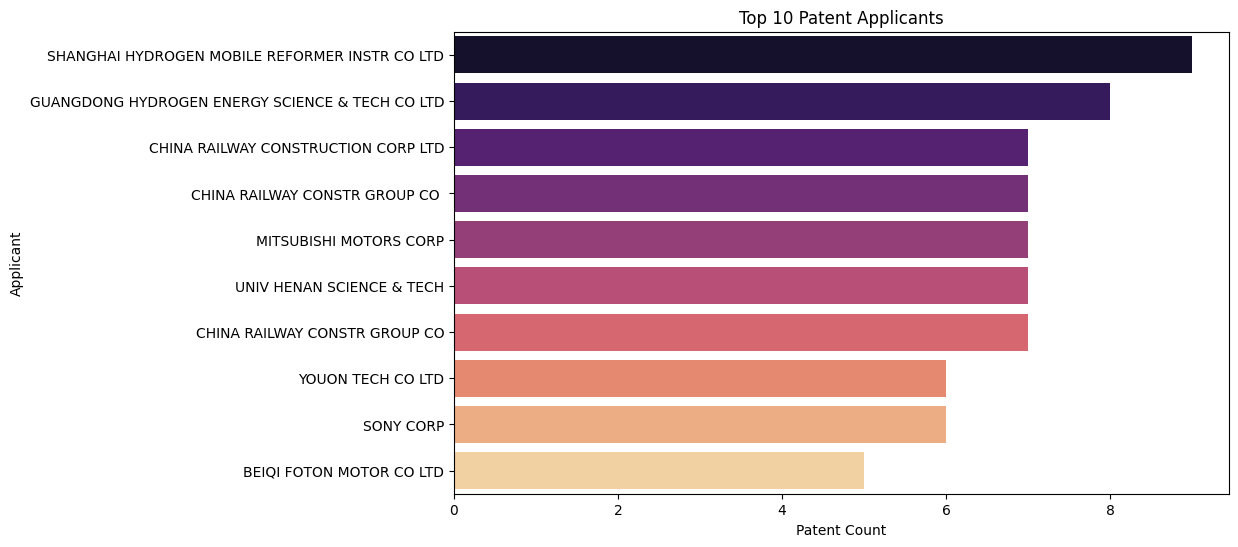

In [212]:
#top 10 applicants 


plt.figure(figsize=(10, 6))
sns.barplot(x='Patent Count', y='Applicant', data=top_10_applicants_df, palette='magma')
plt.title('Top 10 Patent Applicants')
plt.show()

Network Analysis of Applicants

Creating Collaboration Network Graph...


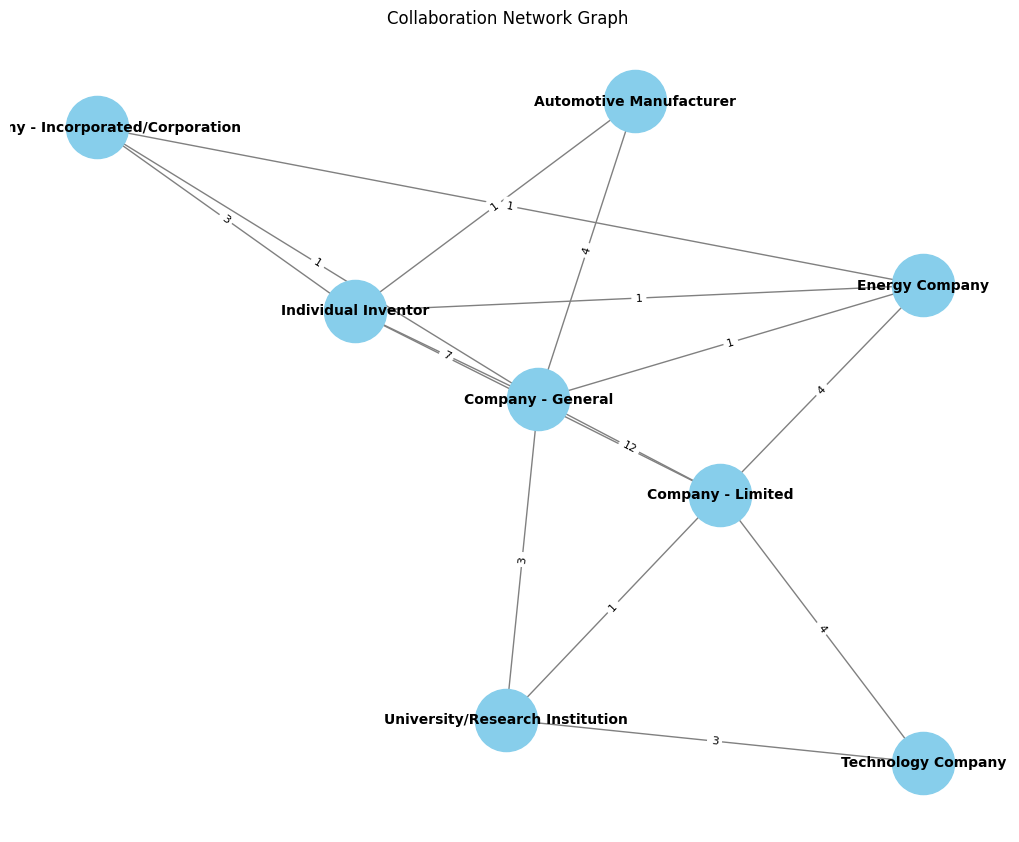

In [213]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def create_collaboration_network(df):
    """
    Creates and visualizes a collaboration network graph between 'First Applicant Type' and 'Second Applicant Type',
    after removing rows that contain 'Unknown'.
    """
    print("Creating Collaboration Network Graph...")

    
    df_filtered = df.copy()

    
    df_filtered = df_filtered[
        (df_filtered['first applicant type'] != "Unknown") & 
        (df_filtered['second applicant type'] != "Unknown")
    ]

   
    df_filtered = df_filtered[['first applicant type', 'second applicant type']].dropna()

    
    G = nx.Graph()

    # Add edges (collaborations)
    for _, row in df_filtered.iterrows():
        applicant1, applicant2 = row['first applicant type'], row['second applicant type']
        if applicant1 != applicant2:  
            if G.has_edge(applicant1, applicant2):
                G[applicant1][applicant2]['weight'] += 1 
            else:
                G.add_edge(applicant1, applicant2, weight=1)

    
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)  

    
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", edge_color="gray", font_size=10, font_weight="bold")

    
    edge_labels = {(u, v): d["weight"] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    plt.title("Collaboration Network Graph ")
    plt.show()

    return G  

create_collaboration_network(df)


**top IPC codes**

In [214]:
df['IPC'].head(2)

0                                           [H04B1/20]
1    [B60L53/12, B60L53/38, B60L53/54, B60L53/66, B...
Name: IPC, dtype: object

In [215]:
import pandas as pd
from ast import literal_eval

# Convert string representations of lists into actual lists
df['IPC'] = df['IPC'].apply(lambda x: literal_eval(x) if isinstance(x, str) else x)

# Explode the IPC lists into individual rows
all_ipc = df['IPC'].explode()

# Count frequencies and extract sorted list of most common IPC classes
most_common_ipc = all_ipc.value_counts().index.tolist()


C:\Users\tasni\AppData\Local\Temp\ipykernel_56760\3970486454.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Main IPC', data=main_ipc_df, palette='plasma')


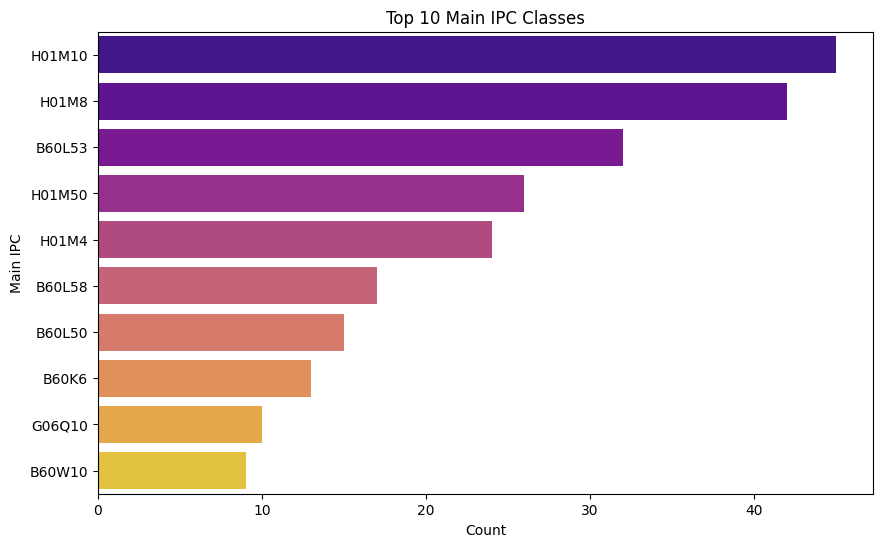

In [216]:

main_ipc = [code.split('/')[0] for code in most_common_ipc]

# Count main CPC frequencies
main_ipc_counts = Counter(main_ipc).most_common(10)
main_ipc_df = pd.DataFrame(main_ipc_counts, columns=['Main IPC', 'Count'])


plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Main IPC', data=main_ipc_df, palette='plasma')
plt.title('Top 10 Main IPC Classes')
plt.show()

geographical analysis 

In [217]:
country_counts.head()

,Country,Filing Counts
0,CN,305
1,US,67
2,JP,53
3,KR,36
4,WO,20


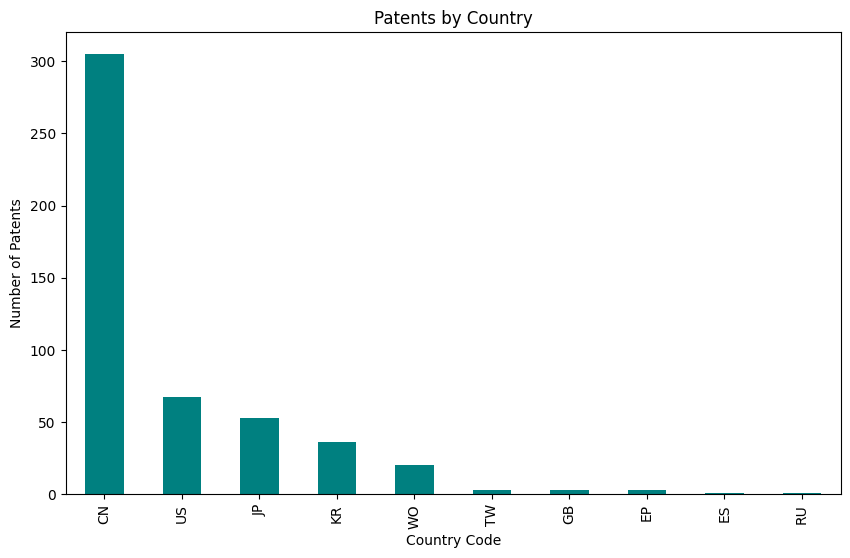

In [218]:
# Extract country codes
df['Country'] = df['Publication number'].str[:2]

# Count patents by country
pub_country_counts = df['Country'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
pub_country_counts.plot(kind='bar', color='teal')
plt.title('Patents by Country')
plt.xlabel('Country Code')
plt.ylabel('Number of Patents')
plt.show()

**market and R&D**

In [219]:
df = df.reset_index(drop=True)
family_df_copy = family_df_copy.reset_index(drop=True)


In [220]:
import pandas as pd
import matplotlib.pyplot as plt

# Build a relationship DataFrame that links each origin country to its filing countries.
records = []
for idx, row in family_df_copy.iterrows():
    # Get the origin country for this patent 
    origin = df.loc[idx, 'first publication country']
    # Record an entry for each filing country in the family
    for filing in row['country_codes']:
        records.append({'origin_country': origin, 'filing_country': filing})

relation_df = pd.DataFrame(records)

# Step 3: Group by origin and filing country to count the occurrences
grouped_df = relation_df.groupby(['origin_country', 'filing_country']).size().reset_index(name='count')

# Step 4: Pivot the grouped DataFrame so that each row is an origin country and each column is a filing country
pivot_df = grouped_df.pivot(index='origin_country', columns='filing_country', values='count').fillna(0)

import matplotlib.pyplot as plt

# Sort the pivot table by total filings per origin country 
pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=True).index]





In [221]:
grouped_df.head(10)

,origin_country,filing_country,count
0,CN,AT,3
1,CN,AU,6
2,CN,BR,3
3,CN,CA,8
4,CN,CN,225
5,CN,CZ,1
6,CN,DE,10
7,CN,DK,4
8,CN,EP,29
9,CN,ES,5


In [222]:
pivot_df.head()

filing_country,AT,AU,BR,CA,CN,CZ,DE,DK,EP,ES,...,IT,JP,KR,MX,NL,PL,RU,TW,US,WO
origin_country,,,,,,,,,,,,,,,,,,,,,
ES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EP,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GB,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TW,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WO,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


<Figure size 1200x800 with 0 Axes>

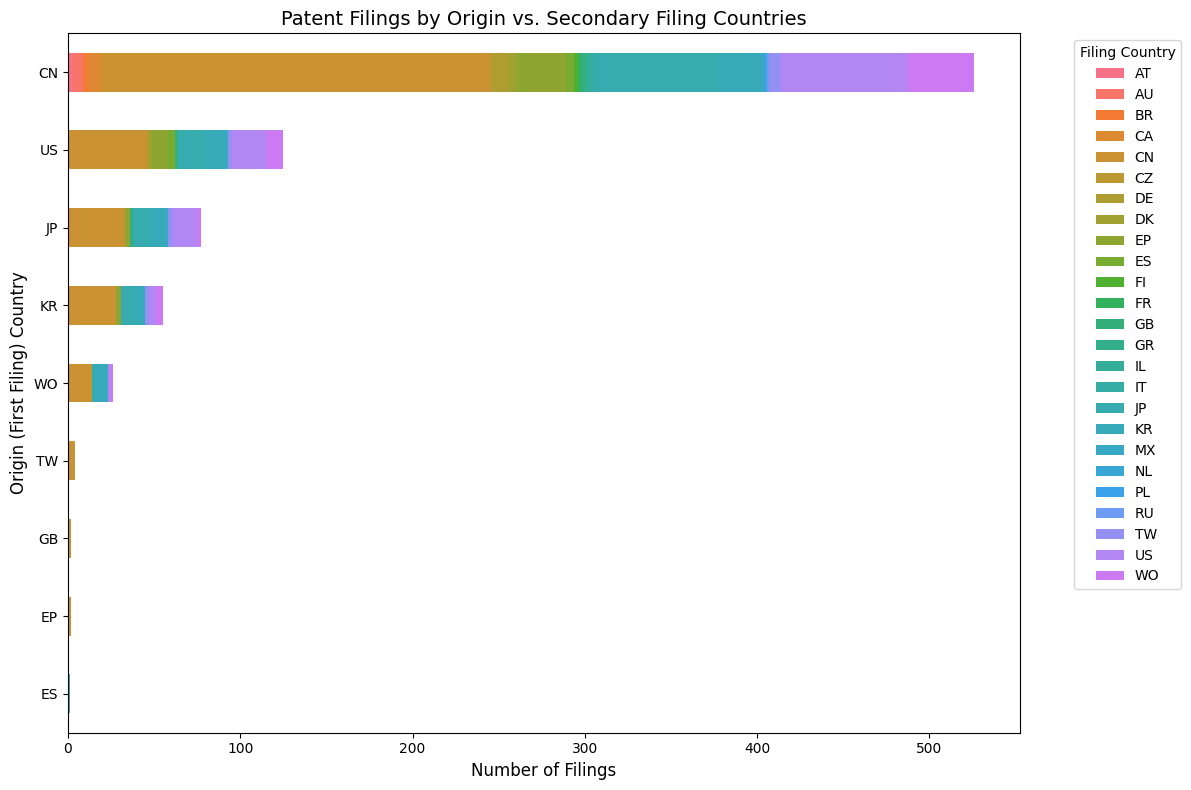

In [223]:
# Plot the stacked horizontal bar chart
plt.figure(figsize=(12, 8))
# pivot_df.plot(kind='barh', stacked=True, colormap='tab20', figsize=(12, 8))
colors = sns.color_palette("husl", 30)  # Generates 30 distinct colors
pivot_df.plot(kind='barh', stacked=True, color=colors, figsize=(12, 8))

# Titles and labels
plt.title('Patent Filings by Origin vs. Secondary Filing Countries', fontsize=14)
plt.xlabel('Number of Filings', fontsize=12)
plt.ylabel('Origin (First Filing) Country', fontsize=12)

# Adjust legend
plt.legend(title='Filing Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
#pivot_df.to_excel('pivot_table.xlsx')

In [225]:
family_counts_df.head()

,country_code,member_count
0,CN,353
1,US,113
2,JP,109
3,KR,59
4,WO,56


In [ ]:
#family_counts_df.to_csv('family_pub_country_counts.csv')

trend over time

C:\Users\tasni\AppData\Local\Temp\ipykernel_56760\2954057496.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Publication Year'] = pd.to_datetime(df['Publication date'], errors='coerce', infer_datetime_format=True).dt.year


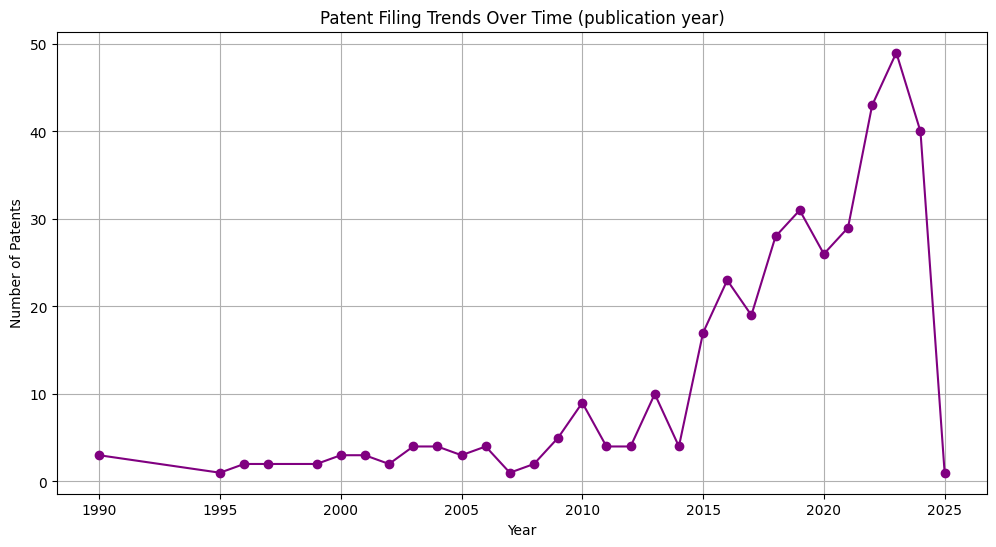

In [227]:
# Extract year from publication date (assuming format: 'YYYY-MM-DD')
df['Publication Year'] = pd.to_datetime(df['Publication date'], errors='coerce', infer_datetime_format=True).dt.year

# Count patents by year
yearly_counts = df['Publication Year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='line', marker='o', color='purple')
plt.title('Patent Filing Trends Over Time (publication year)')
plt.xlabel('Year')
plt.ylabel('Number of Patents')
plt.grid(True)
plt.show()


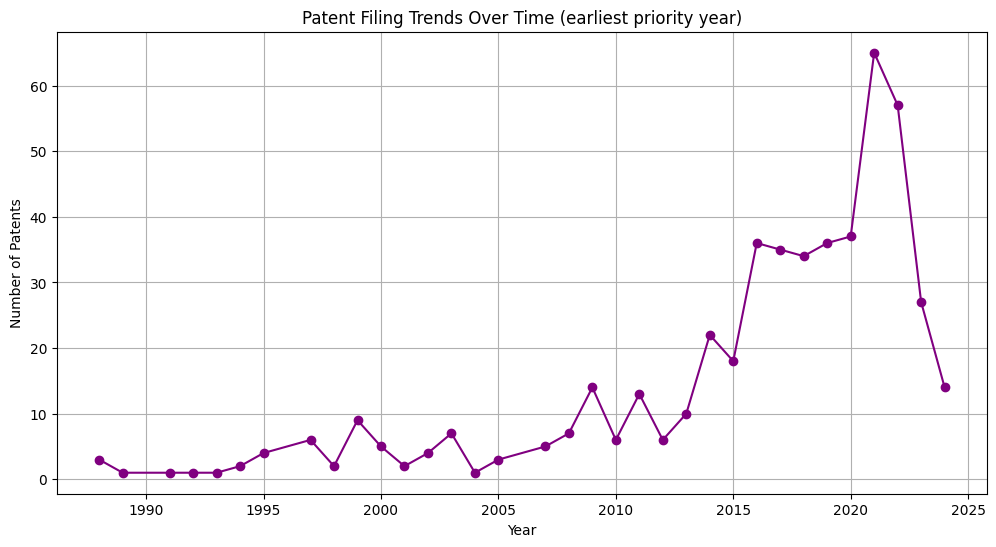

In [230]:
# Extract year from publication date (assuming format: 'YYYY-MM-DD')
#df['Publication Year'] = pd.to_datetime(df['Publication date'], errors='coerce', infer_datetime_format=True).dt.year

# Count patents by year
yearly_counts = df['earliest priority year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='line', marker='o', color='purple')
plt.title('Patent Filing Trends Over Time (earliest priority year)')
plt.xlabel('Year')
plt.ylabel('Number of Patents')
plt.grid(True)
plt.show()


word cloud for innovation themes

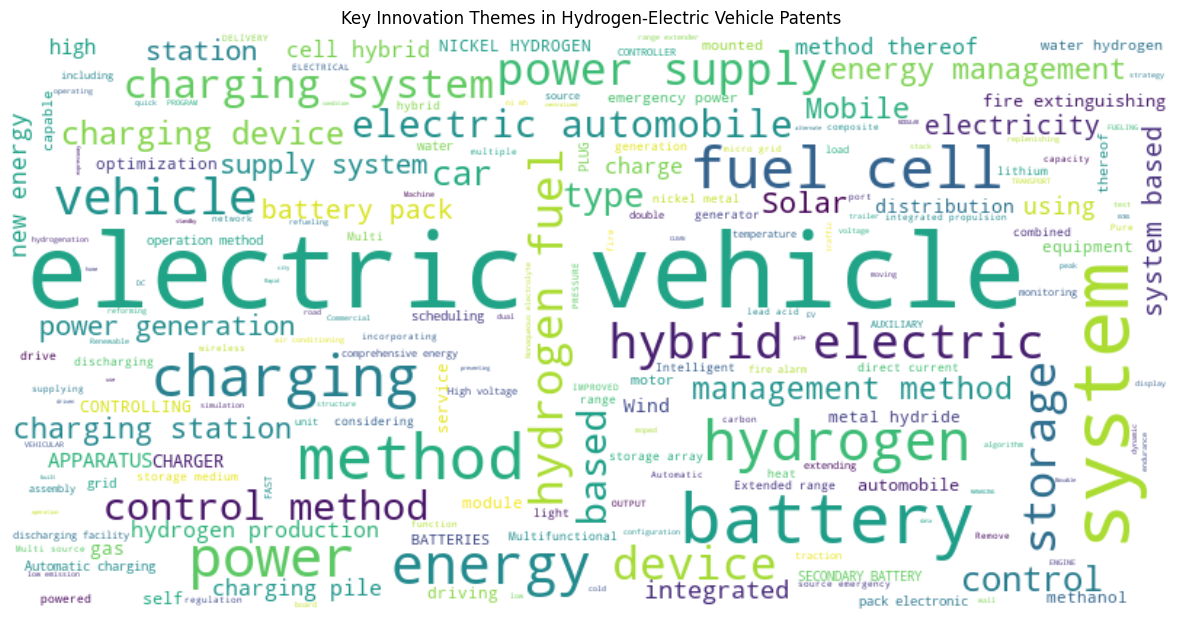

In [231]:
# Combine all titles
text = ' '.join(df['Title'].dropna().astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Key Innovation Themes in Hydrogen-Electric Vehicle Patents')
plt.show()

Patent Age Distribution:


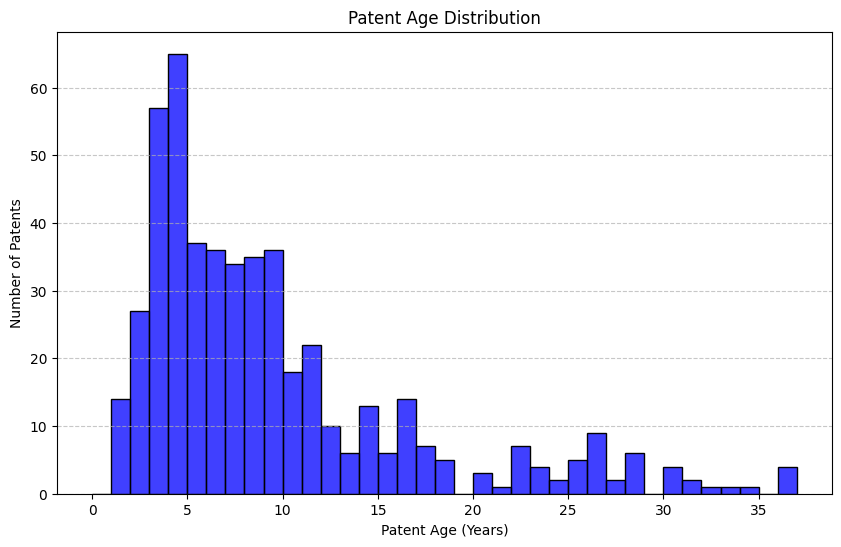

In [232]:
age_distribution = df['Patent Age'].value_counts().sort_index()

# Display the distribution
print("Patent Age Distribution:")
#print(age_distribution)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Patent Age'], bins=range(0, df['Patent Age'].max() + 1), kde=False, color='blue')
plt.title('Patent Age Distribution')
plt.xlabel('Patent Age (Years)')
plt.ylabel('Number of Patents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()